#**Lab Activities 6 and 7**
2021059121
Bayquen, Christopher Gilbert

**Time Estimation** : ~8 hours for both datasets in Activities 6 and 7



In [ ]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

pd.options.display.max_columns = None

##**Bike Sharing Dataset**

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is
publicly available in http://capitalbikeshare.com/system-data.

*dataset collected from : https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset*

In [ ]:
#loading the dataset

bike_df = pd.read_csv("/content/drive/MyDrive/MACHINE-LEARNING-DS/bikesharing_hour.csv")
bike_df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [ ]:
bike_df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
#checking for mising values
missing_values = bike_df.isnull().sum()
print(missing_values[missing_values>0])

Series([], dtype: int64)


In [ ]:
#numerical features
numerical_features = bike_df.select_dtypes(include=np.number)
print(numerical_features.columns)

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


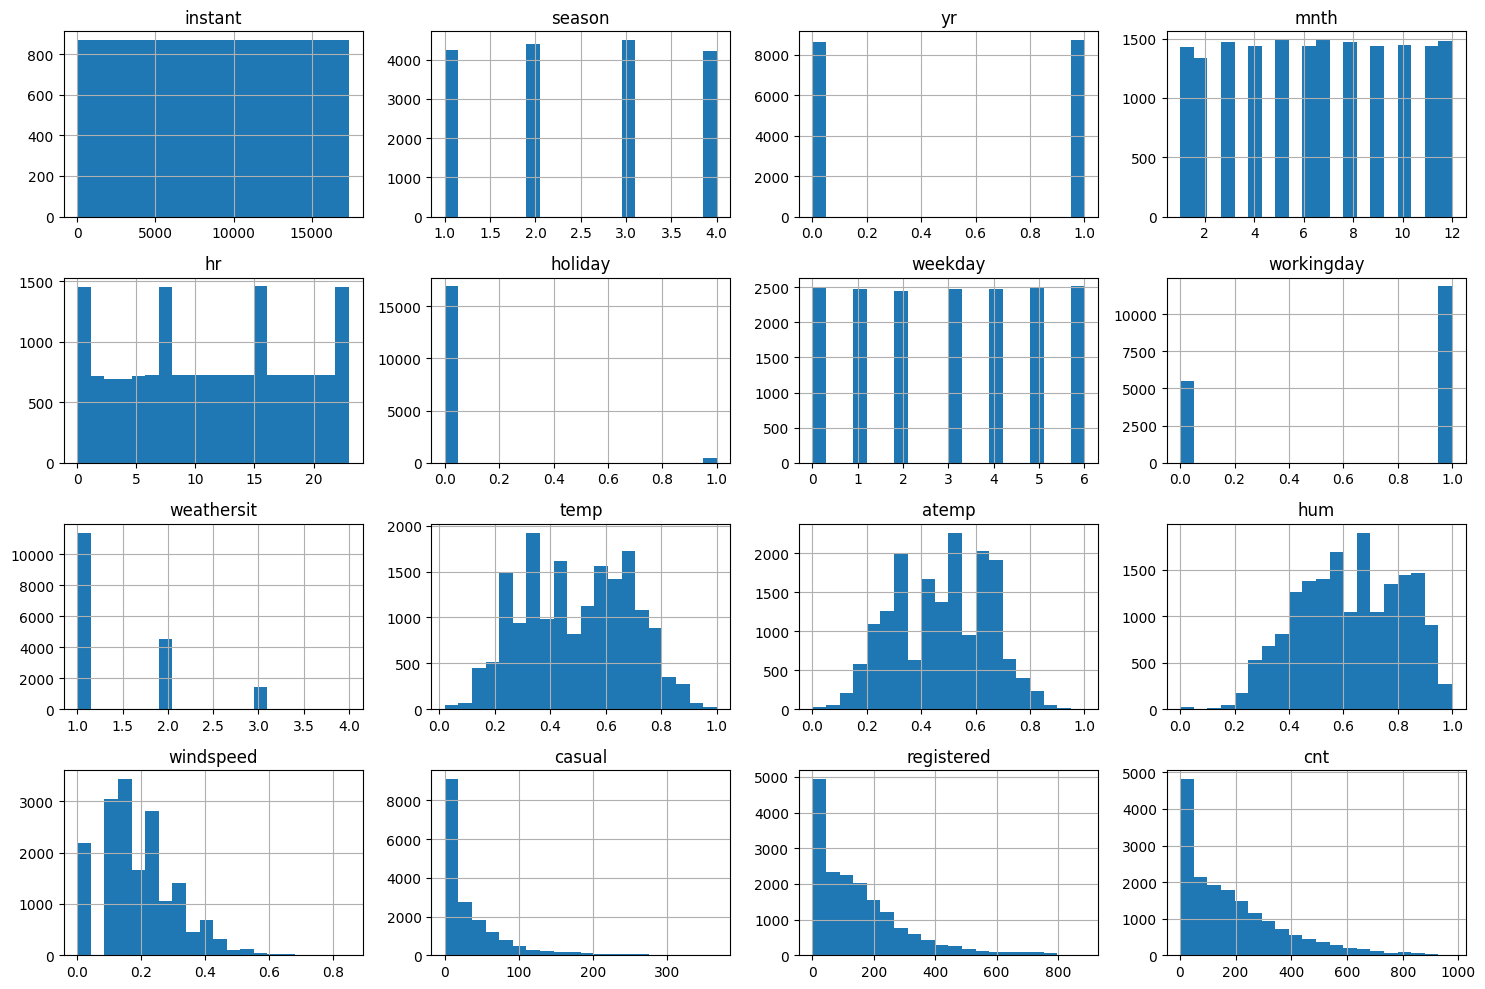

In [ ]:
#checking for normality
numerical_features.hist(bins = 20, figsize=(15, 10))
plt.tight_layout()
plt.show()

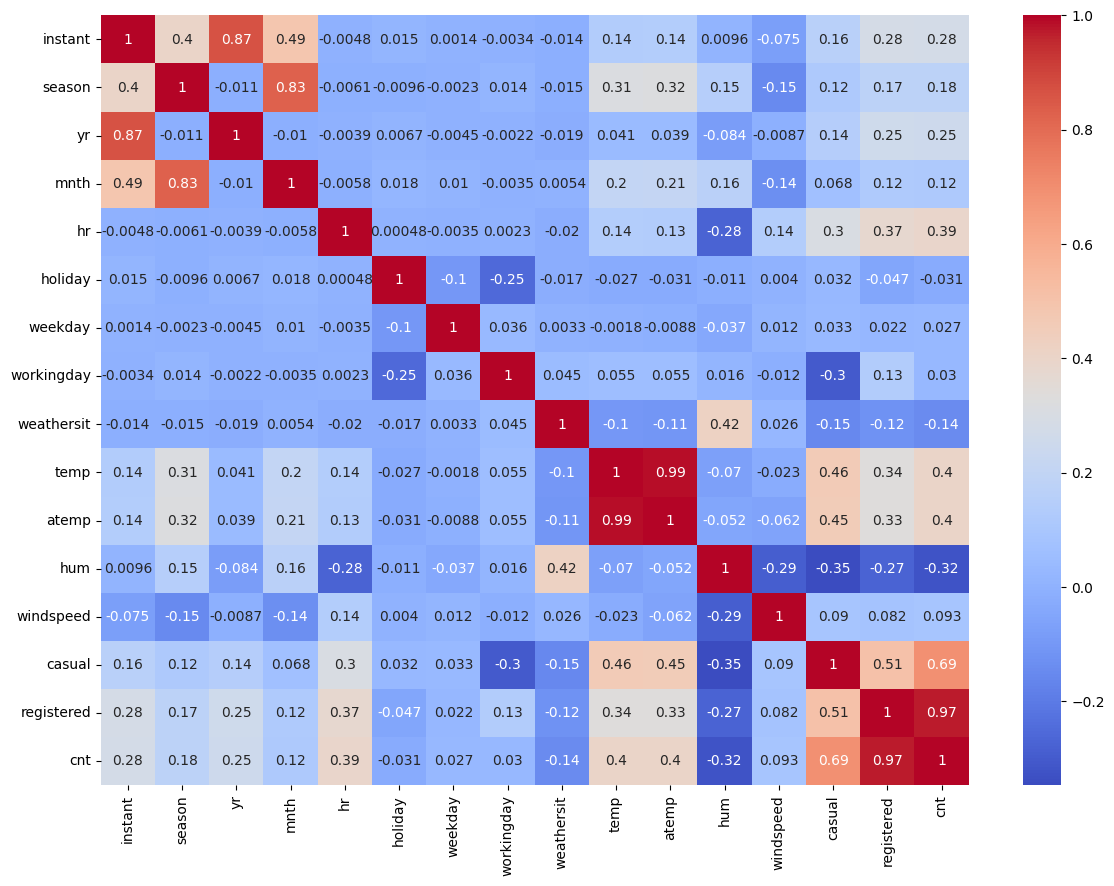

In [ ]:
#checking for correlations between features

plt.figure(figsize=(14, 10))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.show()

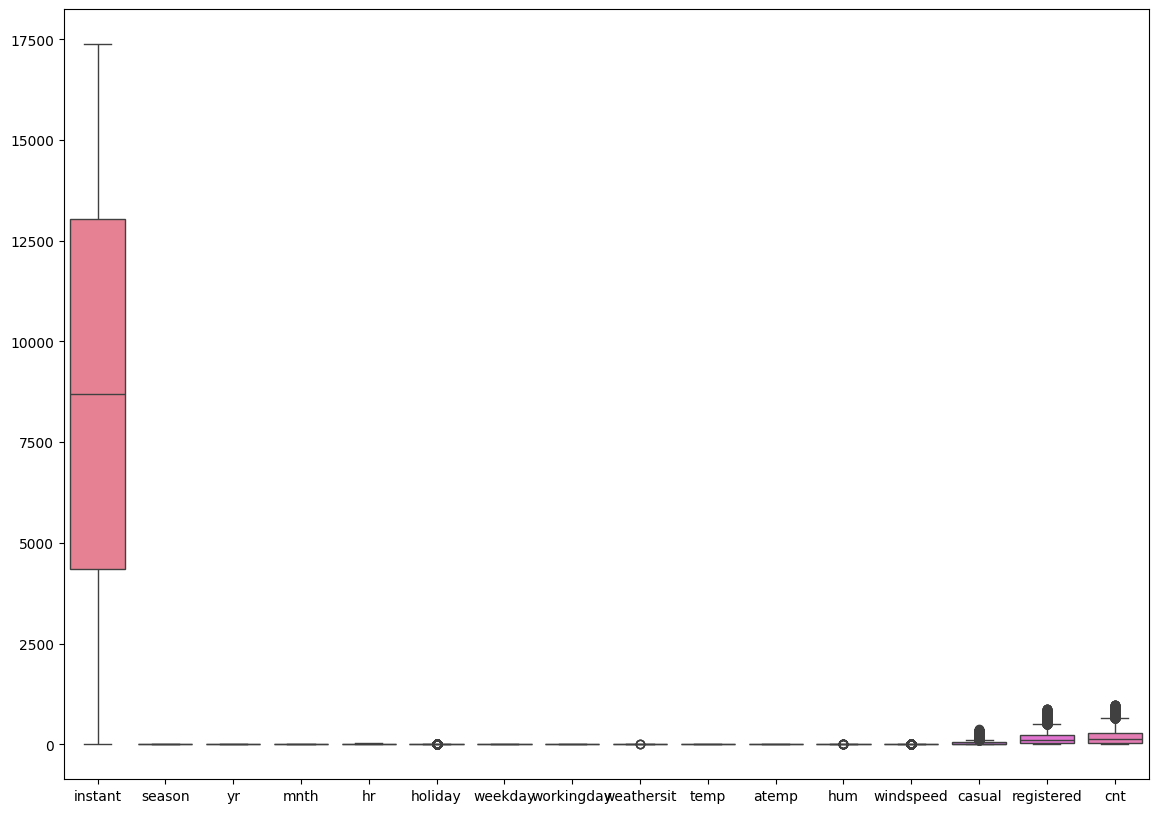

In [ ]:
#Visualizing Outliers

plt.figure(figsize=(14, 10))
sns.boxplot(data=numerical_features)
plt.show()

In [ ]:
#Feature Selection

features = ['temp', 'hr', 'hum', 'season', 'yr','mnth', 'weathersit', 'workingday', 'windspeed']
target = 'cnt'

data = bike_df[features+[target]]
data.head()

temp  hr   hum  season  yr  mnth  weathersit  workingday  windspeed  cnt
0  0.24   0  0.81       1   0     1           1           0        0.0   16
1  0.22   1  0.80       1   0     1           1           0        0.0   40
2  0.22   2  0.80       1   0     1           1           0        0.0   32
3  0.24   3  0.75       1   0     1           1           0        0.0   13
4  0.24   4  0.75       1   0     1           1           0        0.0    1

In [ ]:
#Handling Outliers

def handling_outliers_percentile(df, column):
  Q1 = df[column].quantile(0.05)
  Q3 = df[column].quantile(0.95)

  print(f"Lower bound: {Q1}, Upper bound: {Q3}")

  df = df[(df[column] >= Q1) & (df[column] <= Q3)]
  df = df[((df[column] >= Q1) & (df[column] <= Q3)) | (df[column].isna())]

  return df

#iterating through the dataframe

for col in data.columns[:-1]:
  print(f"Column Name: {col}")
  data = handling_outliers_percentile(data, col)


Column Name: temp
Lower bound: 0.2, Upper bound: 0.8
Column Name: hr
Lower bound: 1.0, Upper bound: 22.0
Column Name: hum
Lower bound: 0.32, Upper bound: 0.94
Column Name: season
Lower bound: 1.0, Upper bound: 4.0
Column Name: yr
Lower bound: 0.0, Upper bound: 1.0
Column Name: mnth
Lower bound: 1.0, Upper bound: 12.0
Column Name: weathersit
Lower bound: 1.0, Upper bound: 3.0
Column Name: workingday
Lower bound: 0.0, Upper bound: 1.0
Column Name: windspeed
Lower bound: 0.0, Upper bound: 0.4179


In [ ]:
bike_df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [ ]:
data.describe()

temp            hr           hum        season            yr  \
count  13114.000000  13114.000000  13114.000000  13114.000000  13114.000000   
mean       0.500477     11.270627      0.650740      2.597301      0.515480   
std        0.171036      6.462998      0.170464      1.099363      0.499779   
min        0.200000      1.000000      0.320000      1.000000      0.000000   
25%        0.340000      6.000000      0.510000      2.000000      0.000000   
50%        0.520000     11.000000      0.650000      3.000000      1.000000   
75%        0.640000     17.000000      0.790000      4.000000      1.000000   
max        0.800000     22.000000      0.940000      4.000000      1.000000   

               mnth    weathersit    workingday     windspeed           cnt  
count  13114.000000  13114.000000  13114.000000  13114.000000  13114.000000  
mean       6.882339      1.439302      0.683468      0.176774    198.307763  
std        3.370095      0.635642      0.465141      0.105566    184.588080  
min        1.000000      1.000000      0.000000      0.000000      1.000000  
25%        4.000000      1.000000      0.000000      0.104500     40.000000  
50%        7.000000      1.000000      1.000000      0.164200    157.000000  
75%       10.000000      2.000000      1.000000      0.253700    293.000000  
max       12.000000      3.000000      1.000000      0.417900    977.000000

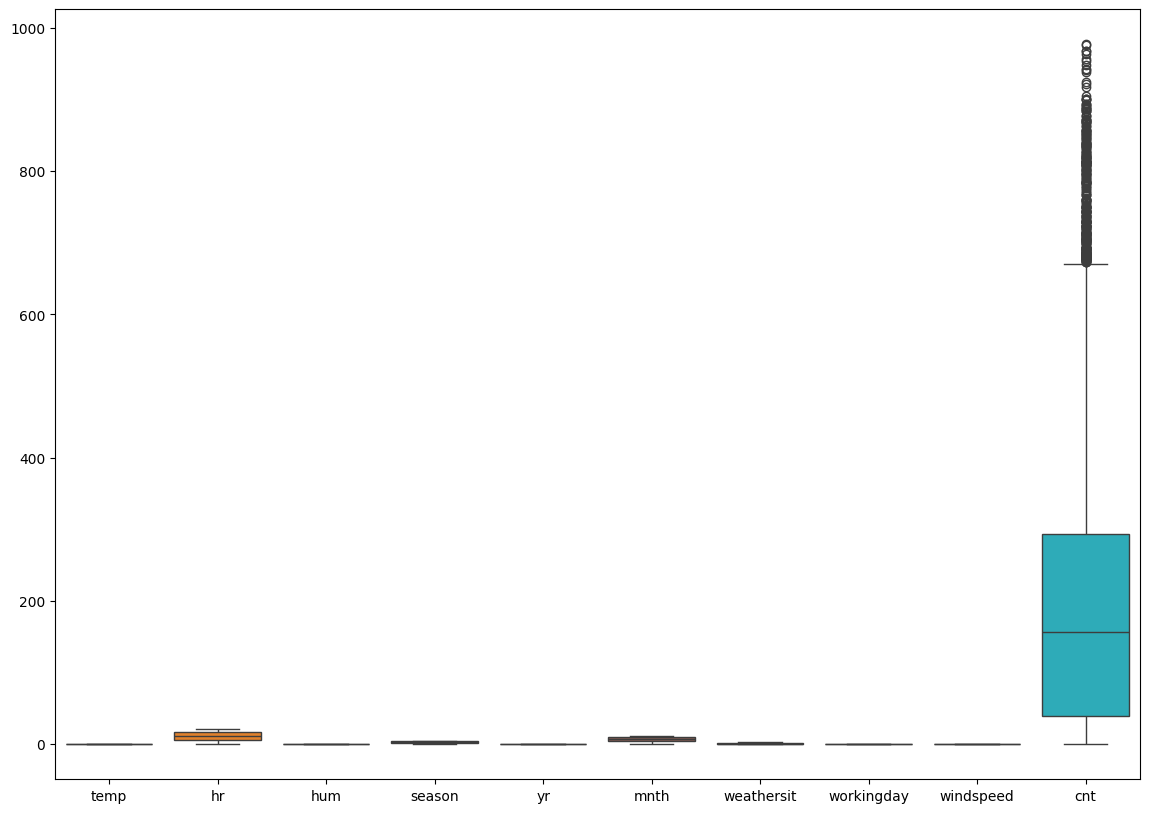

In [ ]:
plt.figure(figsize=(14, 10))
sns.boxplot(data=data)
plt.show()

In [ ]:
# Scaling Features

scaler = MinMaxScaler()

for column in data.columns[:-1]:
  if data[column].dtype in ['intq64', 'float64']:
    data[column] = scaler.fit_transform(data[[column]])

data.describe()

temp            hr           hum        season            yr  \
count  13114.000000  13114.000000  13114.000000  13114.000000  13114.000000   
mean       0.500796     11.270627      0.533451      2.597301      0.515480   
std        0.285059      6.462998      0.274941      1.099363      0.499779   
min        0.000000      1.000000      0.000000      1.000000      0.000000   
25%        0.233333      6.000000      0.306452      2.000000      0.000000   
50%        0.533333     11.000000      0.532258      3.000000      1.000000   
75%        0.733333     17.000000      0.758065      4.000000      1.000000   
max        1.000000     22.000000      1.000000      4.000000      1.000000   

               mnth    weathersit    workingday     windspeed           cnt  
count  13114.000000  13114.000000  13114.000000  13114.000000  13114.000000  
mean       6.882339      1.439302      0.683468      0.423004    198.307763  
std        3.370095      0.635642      0.465141      0.252612    184.588080  
min        1.000000      1.000000      0.000000      0.000000      1.000000  
25%        4.000000      1.000000      0.000000      0.250060     40.000000  
50%        7.000000      1.000000      1.000000      0.392917    157.000000  
75%       10.000000      2.000000      1.000000      0.607083    293.000000  
max       12.000000      3.000000      1.000000      1.000000    977.000000

<function matplotlib.pyplot.show(close=None, block=None)>

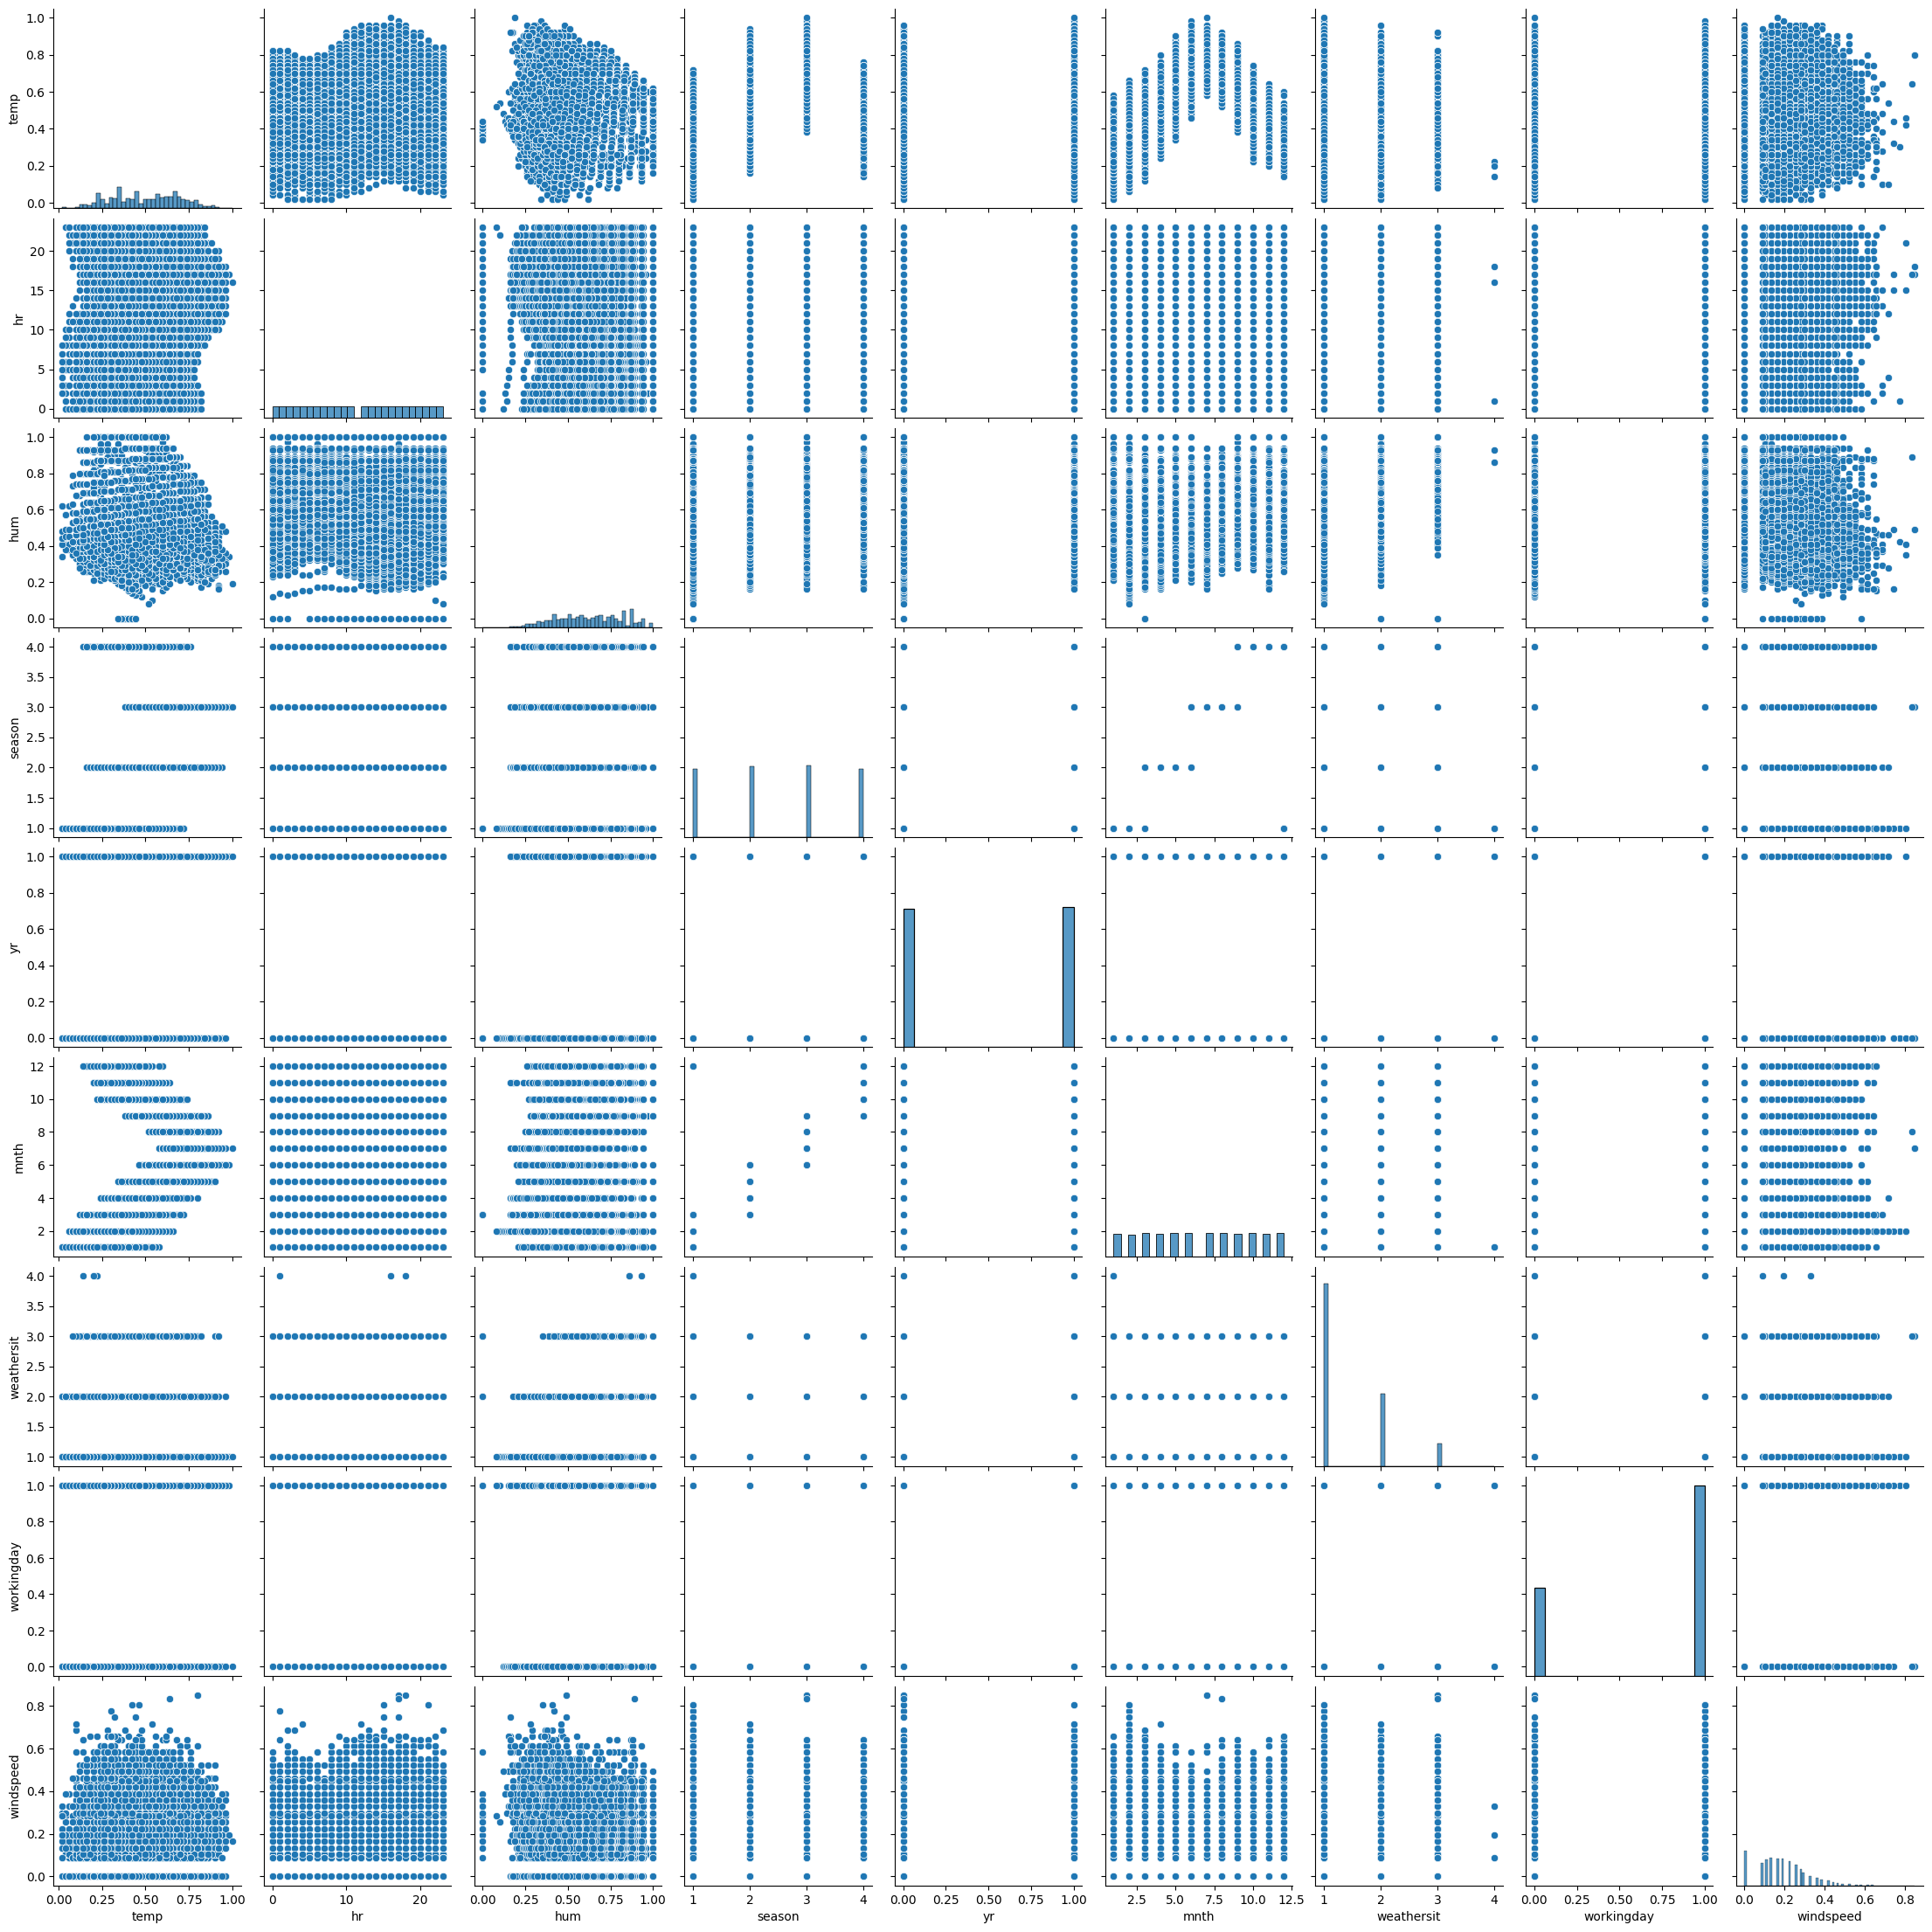

In [ ]:
#Visualize feature relationships

sns.pairplot(bike_df[features])
plt.show

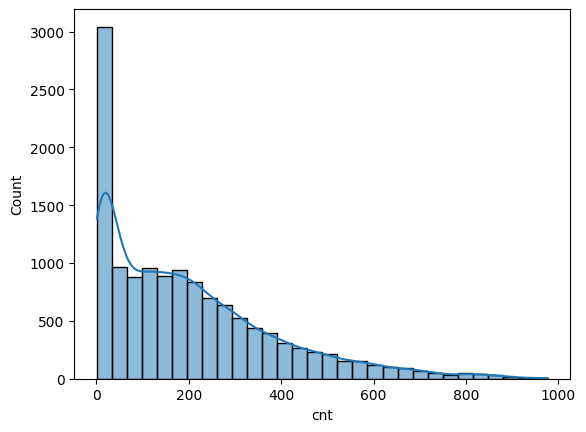

In [ ]:
#Distribution of target variable `count`
sns.histplot(data['cnt'], bins=30, kde=True)
plt.show()

In [ ]:
#checking for correlation

def correlation(data, var1, var2):
  x = pd.Series(data[var1])
  y = pd.Series(data[var2])

  print(f"{var1} and {var2}: {x.corr(y)}")

for col in data.columns[:-1]:
  if data[col].dtype in ['int64', 'float64'] and data[col].name != target:
    correlation(data, col, 'cnt')

temp and cnt: 0.36023709035376583
hr and cnt: 0.44242790563935824
hum and cnt: -0.3150737063787311
season and cnt: 0.15609605844350513
yr and cnt: 0.23010865782899623
mnth and cnt: 0.098757208090468
weathersit and cnt: -0.11509884937678848
workingday and cnt: 0.036945064551907394
windspeed and cnt: 0.09861653042248675


In [ ]:
# Splitting the data into test/train splits

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

test_size = 0.2 #80/20 split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=test_size, random_state = 42)

**Model Implementation**

**1. Simple Linear Regression**


In [ ]:
results = []

#Simple linear regression
print(f"Simple Linear Regression")

for feature in features:

  model = LinearRegression()
  model.fit(train_X[[feature]], train_y)

  y_pred = model.predict(test_X[[feature]])

  #Model Evaluation
  r2 = r2_score(test_y, y_pred)
  mse = mean_squared_error(test_y, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(test_y, y_pred)


  print(f"\nFeature: {feature}")
  print(f"MAE: {mae}")
  print(f"MSE: {mse}")
  print(f"RMSE: {rmse}")
  print(f"R2 Score: {r2}")

  results.append({
      'Model' : f"Simple Linear Regression Using {feature}" ,
      'MAE' : mae,
      'MSE' : mse,
      'RMSE' : rmse,
      'R2' : r2})
  results_df = pd.DataFrame(results)

Simple Linear Regression

Feature: temp
MAE: 131.37118983329617
MSE: 30073.273585749823
RMSE: 173.41647437815655
R2 Score: 0.11080527115756755

Feature: hr
MAE: 122.41036716648706
MSE: 27238.780483157374
RMSE: 165.0417537569126
R2 Score: 0.1946144487177961

Feature: hum
MAE: 134.40464808409172
MSE: 30664.981086977055
RMSE: 175.11419441889072
R2 Score: 0.0933098964153547

Feature: season
MAE: 141.63592784769733
MSE: 33015.37898733231
RMSE: 181.70134558481485
R2 Score: 0.023814255452990762

Feature: yr
MAE: 140.2104339505477
MSE: 31977.16746383523
RMSE: 178.8216079332563
R2 Score: 0.054511685564307966

Feature: mnth
MAE: 142.91823498812306
MSE: 33458.88270879326
RMSE: 182.91769381006654
R2 Score: 0.010700911798512736

Feature: weathersit
MAE: 142.66868690099759
MSE: 33452.05365221323
RMSE: 182.89902583724503
R2 Score: 0.010902830658347185

Feature: workingday
MAE: 143.7128139663775
MSE: 33722.52780083421
RMSE: 183.63694563141212
R2 Score: 0.0029055573799277035

Feature: windspeed
MAE: 14

**2. Multiple Linear Regression**

In [ ]:
#Multiple Linear Regression

model = LinearRegression()
model.fit(train_X, train_y)

y_pred = model.predict(test_X)

#Model Evaluation
r2 = r2_score(test_y, y_pred)
mse = mean_squared_error(test_y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_y, y_pred)

print(f"Multiple Linear Regression\n ")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

results.append({
      'Model' : "Multiple Linear Regression" ,
      'MAE' : mae,
      'MSE' : mse,
      'RMSE' : rmse,
      'R2' : r2})
results_df = pd.DataFrame(results)

Multiple Linear Regression
 
MAE: 107.77848302792557
MSE: 20877.981726333983
RMSE: 144.49215108902624
R2 Score: 0.3826880453506196


**3. Polynomial Linear Regression**

In [ ]:
#Polynomial Linear Regression

def polynomial_linear_regression(degree, train_X, test_X, train_y, test_y, results):
  poly = PolynomialFeatures(degree = degree)
  X_poly_train = poly.fit_transform(train_X)
  X_poly_test = poly.fit_transform(test_X)

  poly_linear_regression = LinearRegression()
  poly_linear_regression.fit(X_poly_train, train_y)

  y_pred = poly_linear_regression.predict(X_poly_test)

  #Model Evaluation
  r2 = r2_score(test_y, y_pred)
  mse = mean_squared_error(test_y, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(test_y, y_pred)

  print(f"\nPolynomial Linear Regression with degree {degree}")
  print(f"MAE: {mae}")
  print(f"MSE: {mse}")
  print(f"RMSE: {rmse}")
  print(f"R2 Score: {r2}")

  results.append({
      'Model' : f"Polynomial Linear Regression with degree {i}" ,
      'MAE' : mae,
      'MSE' : mse,
      'RMSE' : rmse,
      'R2' : r2})

for i in range (2, 7):
  polynomial_linear_regression(i, train_X, test_X, train_y, test_y, results)

results_df = pd.DataFrame(results)



Polynomial Linear Regression with degree 2
MAE: 94.02942755836918
MSE: 15833.24756970951
RMSE: 125.83023313063323
R2 Score: 0.5318487613495397

Polynomial Linear Regression with degree 3
MAE: 85.11354272675322
MSE: 14117.780873053267
RMSE: 118.81826826314743
R2 Score: 0.5825710061301768

Polynomial Linear Regression with degree 4
MAE: 79.56373356377875
MSE: 12647.883163693044
RMSE: 112.46280791307429
R2 Score: 0.626032363649965

Polynomial Linear Regression with degree 5
MAE: 77.8571385563101
MSE: 11637.885321769076
RMSE: 107.87903096417337
R2 Score: 0.6558955827178945

Polynomial Linear Regression with degree 6
MAE: 144.941109632295
MSE: 3666371.8876726767
RMSE: 1914.777242311146
R2 Score: -107.40584239021538


**4. Ridge Regression**

In [ ]:
# Ridge Regression

def ridge_regression(alpha, train_X, train_y, test_X, test_y, results):
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_X, train_y)

  y_pred = ridge.predict(test_X)

  #Model Evaluation
  r2 = r2_score(test_y, y_pred)
  mse = mean_squared_error(test_y, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(test_y, y_pred)

  print(f"\nRidge Regression with alpha {alpha}")
  print(f"MAE: {mae}")
  print(f"MSE: {mse}")
  print(f"RMSE: {rmse}")
  print(f"R2 Score: {r2}")

  results.append({
      'Model' : f"Ridge Regression with alpha {alpha}" ,
      'MAE' : mae,
      'MSE' : mse,
      'RMSE' : rmse,
      'R2' : r2})


alphas = (0.01,0.1,0.5,1,5,10)
for alpha in alphas:
  ridge_regression(alpha, train_X, train_y, test_X, test_y, results)

results_df = pd.DataFrame(results)


Ridge Regression with alpha 0.01
MAE: 107.77841540921764
MSE: 20877.97551142056
RMSE: 144.49212958296573
R2 Score: 0.38268822911073597

Ridge Regression with alpha 0.1
MAE: 107.77780691251257
MSE: 20877.919649310843
RMSE: 144.49193627781048
R2 Score: 0.3826898808196316

Ridge Regression with alpha 0.5
MAE: 107.77510404227476
MSE: 20877.672941478406
RMSE: 144.49108256732802
R2 Score: 0.38269717537981773

Ridge Regression with alpha 1
MAE: 107.77172902981381
MSE: 20877.36814715953
RMSE: 144.4900278467671
R2 Score: 0.382706187418396

Ridge Regression with alpha 5
MAE: 107.74490665906552
MSE: 20875.071452597098
RMSE: 144.48208003969592
R2 Score: 0.38277409518017835

Ridge Regression with alpha 10
MAE: 107.71202783356003
MSE: 20872.54545922385
RMSE: 144.47333822966732
R2 Score: 0.38284878275904066


**5. Lasso Regression**

In [ ]:
#Lasso Regression

def lasso_regression(alpha, train_X, train_y, test_X, test_y, results):

  lasso = Lasso(alpha = alpha)
  lasso.fit(train_X, train_y)

  y_pred = lasso.predict(test_X)

  #Model Evaluation
  r2 = r2_score(test_y, y_pred)
  mse = mean_squared_error(test_y, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(test_y, y_pred)

  print(f"\nLasso Regression with alpha {alpha}")
  print(f"MAE: {mae}")
  print(f"MSE: {mse}")
  print(f"RMSE: {rmse}")
  print(f"R2 Score: {r2}")

  results.append({
      'Model' : f"Lasso Regression with alpha {alpha}" ,
      'MAE' : mae,
      'MSE' : mse,
      'RMSE' : rmse,
      'R2' : r2})

alphas = (0.01,0.1,0.5,1,5,10)
for alpha in alphas:
  lasso_regression(alpha, train_X, train_y, test_X, test_y, results)

results_df = pd.DataFrame(results)


Lasso Regression with alpha 0.01
MAE: 107.77258295049377
MSE: 20877.841354864526
RMSE: 144.49166534739825
R2 Score: 0.3826921957990357

Lasso Regression with alpha 0.1
MAE: 107.72022149868282
MSE: 20877.0108490135
RMSE: 144.4887914303857
R2 Score: 0.3827167518694914

Lasso Regression with alpha 0.5
MAE: 107.5183706546723
MSE: 20882.736924913846
RMSE: 144.50860502030267
R2 Score: 0.38254744550871145

Lasso Regression with alpha 1
MAE: 107.34199038558562
MSE: 20911.49446285268
RMSE: 144.60807191458116
R2 Score: 0.3816971539341416

Lasso Regression with alpha 5
MAE: 107.73125914068581
MSE: 21519.312745818974
RMSE: 146.69462412037797
R2 Score: 0.363725421932083

Lasso Regression with alpha 10
MAE: 112.13084812534171
MSE: 23331.698198975253
RMSE: 152.74717083787593
R2 Score: 0.31013752146683715


**6. Decision Tree Regression**

In [ ]:
#Decision Tree Regression

def decision_tree_regression(max_depth, train_X, train_y, test_X, test_y, results):

  tree = DecisionTreeRegressor(max_depth = max_depth)
  tree.fit(train_X, train_y)

  y_pred = tree.predict(test_X)

  #Model Evaluation
  r2 = r2_score(test_y, y_pred)
  mse = mean_squared_error(test_y, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(test_y, y_pred)

  print(f"\nDecision Tree with max depth of {max_depth}")
  print(f"MAE: {mae}")
  print(f"MSE: {mse}")
  print(f"RMSE: {rmse}")
  print(f"R2 Score: {r2}")

  results.append({
      'Model' : f"Decision Tree with max depth of {max_depth}" ,
      'MAE' : mae,
      'MSE' : mse,
      'RMSE' : rmse,
      'R2' : r2,})


max_depths = (2,4,6,8,10,12,14,16)
for max_depth in max_depths:
  decision_tree_regression(max_depth, train_X, train_y, test_X, test_y, results)

results_df = pd.DataFrame(results)



Decision Tree with max depth of 2
MAE: 97.00147279339997
MSE: 19695.37190212378
RMSE: 140.34020059171849
R2 Score: 0.4176549876413076

Decision Tree with max depth of 4
MAE: 84.57526753561376
MSE: 15520.22271947447
RMSE: 124.58018590239168
R2 Score: 0.5411041570427302

Decision Tree with max depth of 6
MAE: 70.28643685357612
MSE: 11945.66722632492
RMSE: 109.29623610319305
R2 Score: 0.6467952083810673

Decision Tree with max depth of 8
MAE: 49.94849210951069
MSE: 6456.372194365854
RMSE: 80.35155377692365
R2 Score: 0.809100525544538

Decision Tree with max depth of 10
MAE: 39.80957054040248
MSE: 4243.424697112947
RMSE: 65.14157426032124
R2 Score: 0.8745320870322355

Decision Tree with max depth of 12
MAE: 36.50739832121776
MSE: 3565.9040849022176
RMSE: 59.715191408068165
R2 Score: 0.894564750099064

Decision Tree with max depth of 14
MAE: 38.119557352561145
MSE: 4207.9032691392395
RMSE: 64.8683533715728
R2 Score: 0.8755823706478558

Decision Tree with max depth of 16
MAE: 39.44282187001

**7. Random Forest Regression**



In [ ]:
#Random Forest Regression

def random_forest_regression(n_estimators, train_X, train_y, test_X, test_y, results):
  forest = RandomForestRegressor(n_estimators=n_estimators, random_state = 42)
  forest.fit(train_X, train_y)

  y_pred = forest.predict(test_X)

  #Model Evaluation
  r2 = r2_score(test_y, y_pred)
  mse = mean_squared_error(test_y, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(test_y, y_pred)

  print(f"\nRandom Forest with {n_estimators} Trees")
  print(f"MAE: {mae}")
  print(f"MSE: {mse}")
  print(f"RMSE: {rmse}")
  print(f"R2 Score: {r2}")

  results.append({
      'Model' : f"Random Forest with {n_estimators} Trees" ,
      'MAE' : mae,
      'MSE' : mse,
      'RMSE' : rmse,
      'R2' : r2,})

n_estimars = (10,50,100,200,300,400,500)
for n_estimator in n_estimars:
  random_forest_regression(n_estimator, train_X, train_y, test_X, test_y, results)

results_df = pd.DataFrame(results)




Random Forest with 10 Trees
MAE: 31.80344035364813
MSE: 2621.4820969517646
RMSE: 51.200411101394145
R2 Score: 0.9224890481005413

Random Forest with 50 Trees
MAE: 30.51912546520705
MSE: 2418.497445618916
RMSE: 49.1782212531006
R2 Score: 0.9284908184594095

Random Forest with 100 Trees
MAE: 30.31291616288147
MSE: 2400.8304307791723
RMSE: 48.99826967127689
R2 Score: 0.9290131898076796

Random Forest with 200 Trees
MAE: 30.18248104451464
MSE: 2375.8740200388747
RMSE: 48.742938155581825
R2 Score: 0.9297510911478122

Random Forest with 300 Trees
MAE: 30.22234884174791
MSE: 2387.970394337238
RMSE: 48.86686397076487
R2 Score: 0.9293934303087439

Random Forest with 400 Trees
MAE: 30.13680582711545
MSE: 2376.3990964632085
RMSE: 48.74832403748059
R2 Score: 0.9297355658945528

Random Forest with 500 Trees
MAE: 30.076039691011747
MSE: 2368.4034723157524
RMSE: 48.666245718318486
R2 Score: 0.9299719773655372


**Model Evaluation and Analysis of the Bike Sharing Dataset**


In [ ]:
#Model Evaluation
results_df.sort_values(by = 'R2', ascending = False)

Model         MAE           MSE  \
41                Random Forest with 500 Trees   30.076040  2.368403e+03   
38                Random Forest with 200 Trees   30.182481  2.375874e+03   
40                Random Forest with 400 Trees   30.136806  2.376399e+03   
39                Random Forest with 300 Trees   30.222349  2.387970e+03   
37                Random Forest with 100 Trees   30.312916  2.400830e+03   
36                 Random Forest with 50 Trees   30.519125  2.418497e+03   
35                 Random Forest with 10 Trees   31.803440  2.621482e+03   
32          Decision Tree with max depth of 12   36.507398  3.565904e+03   
33          Decision Tree with max depth of 14   38.119557  4.207903e+03   
31          Decision Tree with max depth of 10   39.809571  4.243425e+03   
34          Decision Tree with max depth of 16   39.442822  4.483774e+03   
30           Decision Tree with max depth of 8   49.948492  6.456372e+03   
13  Polynomial Linear Regression with degree 5   77.857139  1.163789e+04   
29           Decision Tree with max depth of 6   70.286437  1.194567e+04   
12  Polynomial Linear Regression with degree 4   79.563734  1.264788e+04   
11  Polynomial Linear Regression with degree 3   85.113543  1.411778e+04   
28           Decision Tree with max depth of 4   84.575268  1.552022e+04   
10  Polynomial Linear Regression with degree 2   94.029428  1.583325e+04   
27           Decision Tree with max depth of 2   97.001473  1.969537e+04   
20              Ridge Regression with alpha 10  107.712028  2.087255e+04   
19               Ridge Regression with alpha 5  107.744907  2.087507e+04   
22             Lasso Regression with alpha 0.1  107.720221  2.087701e+04   
18               Ridge Regression with alpha 1  107.771729  2.087737e+04   
17             Ridge Regression with alpha 0.5  107.775104  2.087767e+04   
21            Lasso Regression with alpha 0.01  107.772583  2.087784e+04   
16             Ridge Regression with alpha 0.1  107.777807  2.087792e+04   
15            Ridge Regression with alpha 0.01  107.778415  2.087798e+04   
9                   Multiple Linear Regression  107.778483  2.087798e+04   
23             Lasso Regression with alpha 0.5  107.518371  2.088274e+04   
24               Lasso Regression with alpha 1  107.341990  2.091149e+04   
25               Lasso Regression with alpha 5  107.731259  2.151931e+04   
26              Lasso Regression with alpha 10  112.130848  2.333170e+04   
1            Simple Linear Regression Using hr  122.410367  2.723878e+04   
0          Simple Linear Regression Using temp  131.371190  3.007327e+04   
2           Simple Linear Regression Using hum  134.404648  3.066498e+04   
4            Simple Linear Regression Using yr  140.210434  3.197717e+04   
3        Simple Linear Regression Using season  141.635928  3.301538e+04   
6    Simple Linear Regression Using weathersit  142.668687  3.345205e+04   
8     Simple Linear Regression Using windspeed  143.260153  3.345721e+04   
5          Simple Linear Regression Using mnth  142.918235  3.345888e+04   
7    Simple Linear Regression Using workingday  143.712814  3.372253e+04   
14  Polynomial Linear Regression with degree 6  144.941110  3.666372e+06   

           RMSE          R2  
41    48.666246    0.929972  
38    48.742938    0.929751  
40    48.748324    0.929736  
39    48.866864    0.929393  
37    48.998270    0.929013  
36    49.178221    0.928491  
35    51.200411    0.922489  
32    59.715191    0.894565  
33    64.868353    0.875582  
31    65.141574    0.874532  
34    66.960986    0.867426  
30    80.351554    0.809101  
13   107.879031    0.655896  
29   109.296236    0.646795  
12   112.462808    0.626032  
11   118.818268    0.582571  
28   124.580186    0.541104  
10   125.830233    0.531849  
27   140.340201    0.417655  
20   144.473338    0.382849  
19   144.482080    0.382774  
22   144.488791    0.382717  
18   144.490028    0.382706  
17   144.491083    0.382697  
21   144.491665    0.3

The table above shows all of the key evaluation metrics for each of the regression models to predict the value of `cnt`. Based on the evaluation metrics, we can compare the models' accuracy and performance.

**Model Performance Overview**

1. Simple Linear Regression:
> Among the different features used in the simple linear regression models, the model using `hr` (Humidity Ratio) performed the best among them in terms of MAE, MSE, RMSE, and $R^2$ values. This suggessts that `hr` may be the strongest individual predictor among the features used.

2. Multiple Linear Regression:
> The multiple linear regression model incorporates all features simultaneously to predict the target variable `cnt`. Compared to the simple linear regression models, The multiple linear regression model has lower MAE, MSE, and RMSE than any individual simple linear regression model, indicating better accuracy.

3. Polynomial Regression:
> As the degree of the polynomial increases, the model's performance improves up to degree 5, with an MAE of 77.86, MSE of 11637.89, RMSE of 107.88, and R² of 0.656. However, the polynomial regression model with degree 6 performs poorly, with extreme values in MSE, RMSE, and a large negative R², likely due to overfitting.

4. Ridge and Lasso Regression:
> The Ridge and Lasso Regression shows very similar results to the multiple linear regression model, only with slight improvements in the RMSE and $R^2$ values. Among the different alphas, the Ridge Regression with higher alpha values shows a slightly better performance than the other models with lower alphas.

5. Decision Tree Regression:
>The Decision Tree models perform relatively well especially as the depth of the trees increased. The decision tree model with a maximum depth of 12 showed the best performance with low MAE of 36.76, RMSE of 60.46, and a high $R^2$ of 0.892. However, increasing the depth further to 14 or 16 does not improve performance and may lead to overfitting.

6. Random Forest Regression:
> Random Forest models provide the best performance across all metrics. With 500 trees, Random Forest achieves the lowest MAE (30.08), MSE (2368.40), RMSE (48.67), and the highest R² (0.930). The performance stabilizes beyond 200 trees (having an $R^2$ value of ~0.92), indicating that 200 to 500 trees provide the best results without significant additional benefit from more trees.

**Conclusion**

The Random Forest model with 500 trees performs the best overall, with the lowest error metrics and highest R² value, indicating strong predictive performance and low variance. This will be the model that we are going to use for **Lab Activities 8 and 9** to improve the performance and accuracy through different data pre-processing techniques and feature engineering.







##**Life Expectancy Dataset**

Data about Population, GDP, and Life Expectancy was updated according to World Bank Data. Information about vaccinations for Measles, Hepatitis B, Polio, and Diphtheria, alcohol consumption, BMI, HIV incidents, mortality rates, and thinness were collected from World Health Organization public datasets. Information about Schooling was collected from the Our World in Data which is a project of the University of Oxford. The database has one variable that categorizes countries into two groups: Developed vs Developing countries. According to World Trade Organization, each country defines itself as “Developed” or “Developing”.

*dataset collected from: https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated*

In [ ]:
#loading the dataset

life_df = pd.read_csv("/content/drive/MyDrive/MACHINE-LEARNING-DS/Life-Expectancy-Data-Updated.csv")
life_df.head()

Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  Polio  \
0         105.8240                 1.32           97       65  27.8     97   
1          57.9025                10.35           97       94  26.0     97   
2         201.0765                 1.57           60       35  21.2     67   
3         222.1965                 5.68           93       74  25.3     92   
4          57.9510                 2.89           97       89  27.0     94   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0          97           0.08           11006           78.53   
1          97           0.09           25742           46.44   
2          64           0.13            1076         1183.21   
3          93           0.79            4146            0.75   
4          94           0.08           33995            7.91   

   Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                          4.9                       4.8        7.8   
1                          0.6                       0.5        9.7   
2                         27.1                      28.0        5.0   
3                          5.7                       5.5        7.9   
4                          1.2                       1.1       12.8   

   Economy_status_Developed  Economy_status_Developing  Life_expectancy  
0                         0                          1             76.5  
1                         1                          0             82.8  
2                         0                          1             65.4  
3                         0                          1             67.0  
4                         1                          0             81.7

In [ ]:
life_df.describe()

Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
count  2864.000000    2864.000000        2864.000000      2864.000000   
mean   2007.500000      30.363792          42.938268       192.251775   
std       4.610577      27.538117          44.569974       114.910281   
min    2000.000000       1.800000           2.300000        49.384000   
25%    2003.750000       8.100000           9.675000       106.910250   
50%    2007.500000      19.600000          23.100000       163.841500   
75%    2011.250000      47.350000          66.000000       246.791375   
max    2015.000000     138.100000         224.900000       719.360500   

       Alcohol_consumption  Hepatitis_B      Measles          BMI  \
count          2864.000000  2864.000000  2864.000000  2864.000000   
mean              4.820882    84.292598    77.344972    25.032926   
std               3.981949    15.995511    18.659693     2.193905   
min               0.000000    12.000000    10.000000    19.800000   
25%               1.200000    78.000000    64.000000    23.200000   
50%               4.020000    89.000000    83.000000    25.500000   
75%               7.777500    96.000000    93.000000    26.400000   
max              17.870000    99.000000    99.000000    32.100000   

             Polio   Diphtheria  Incidents_HIV  GDP_per_capita  \
count  2864.000000  2864.000000    2864.000000     2864.000000   
mean     86.499651    86.271648       0.894288    11540.924930   
std      15.080365    15.534225       2.381389    16934.788931   
min       8.000000    16.000000       0.010000      148.000000   
25%      81.000000    81.000000       0.080000     1415.750000   
50%      93.000000    93.000000       0.150000     4217.000000   
75%      97.000000    97.000000       0.460000    12557.000000   
max      99.000000    99.000000      21.680000   112418.000000   

       Population_mln  Thinness_ten_nineteen_years  Thinness_five_nine_years  \
count     2864.000000                  2864.000000               2864.000000   
mean        36.675915                     4.865852                  4.899825   
std        136.485867                     4.438234                  4.525217   
min          0.080000                     0.100000                  0.100000   
25%          2.097500                     1.600000                  1.600000   
50%          7.850000                     3.300000                  3.400000   
75%         23.687500                     7.200000                  7.300000   
max       1379.860000                    27.700000                 28.600000   

         Schooling  Economy_status_Developed  Economy_status_Developing  \
count  2864.000000               2864.000000                2864.000000   
mean      7.632123                  0.206704                   0.793296   
std       3.171556                  0.405012                   0.405012   
min       1.100000                  0.000000                   0.000000   
25%       5.100000                  0.000000                   1.000000   
50%       7.800000                  0.000000                   1.000000   
75%      10.300000                  0.000000                   1.000000   
max      14.100000                  1.000000                   1.000000   

       Life_expectancy  
count      2864.000000  
mean         68.856075  
std           9.405608  
min          39.400000  
25%          62.700000  
50%          71.400000  
75%          75.400000  
max          83.800000

In [ ]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [ ]:
#checking for mising values
missing_values_2 = life_df.isnull().sum()
print(missing_values_2[missing_values_2>0])

Series([], dtype: int64)


In [ ]:
#numerical features
numerical_features_2 = life_df.select_dtypes(include=np.number)
print(numerical_features_2.columns)

Index(['Year', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality',
       'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio',
       'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Population_mln',
       'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling',
       'Economy_status_Developed', 'Economy_status_Developing',
       'Life_expectancy'],
      dtype='object')


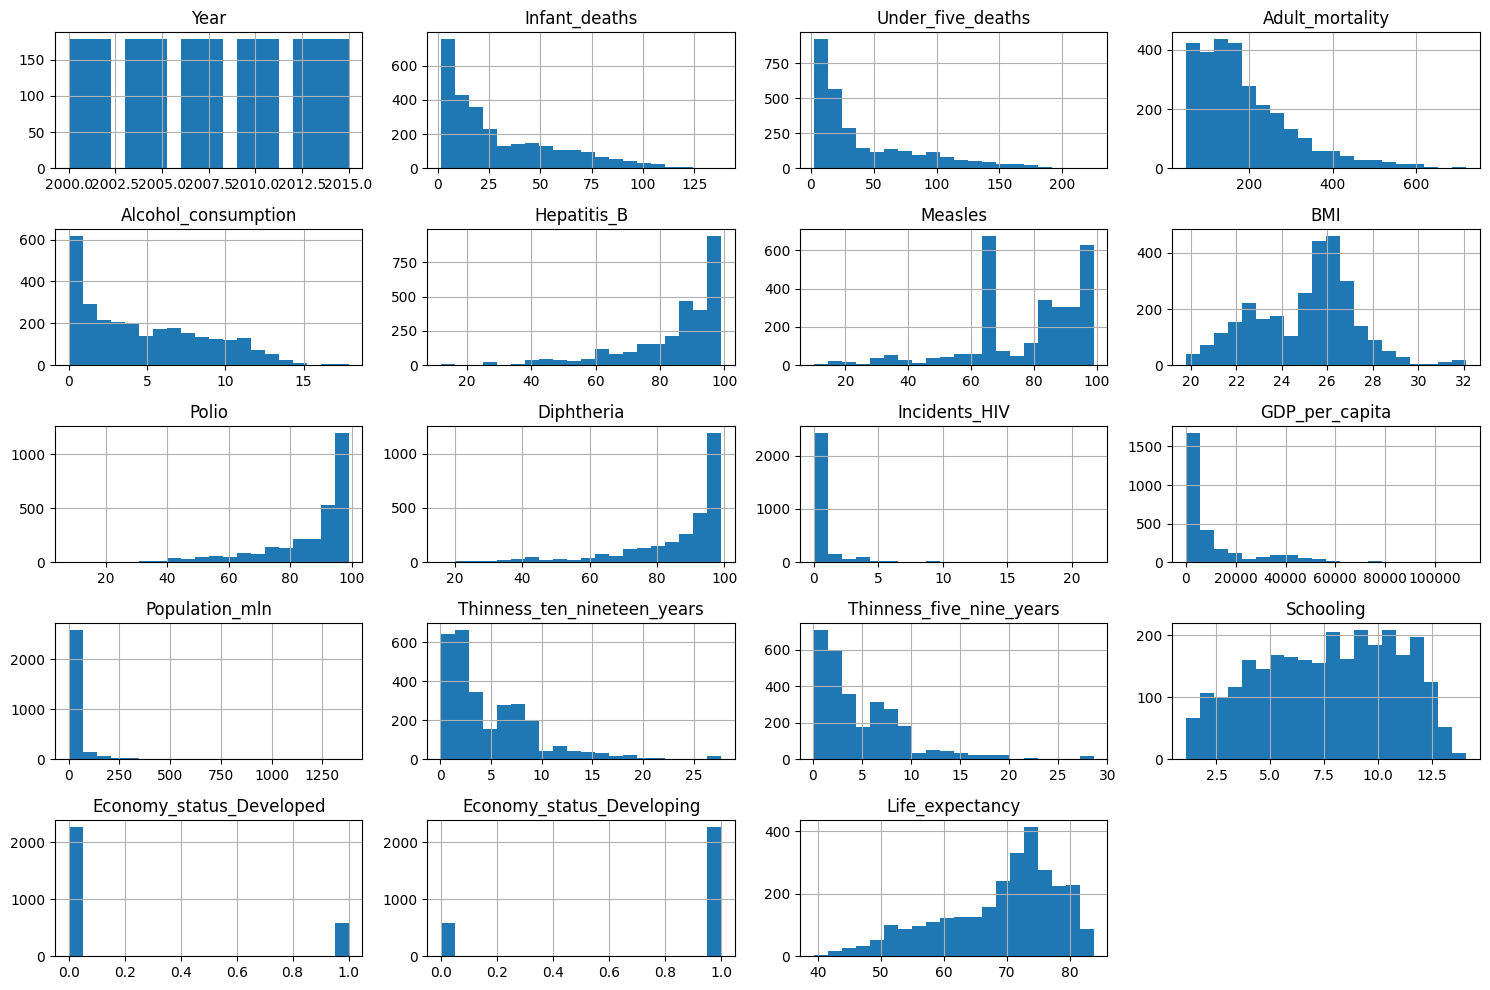

In [ ]:
#checking for normality
numerical_features_2.hist(bins = 20, figsize=(15, 10))
plt.tight_layout()
plt.show()

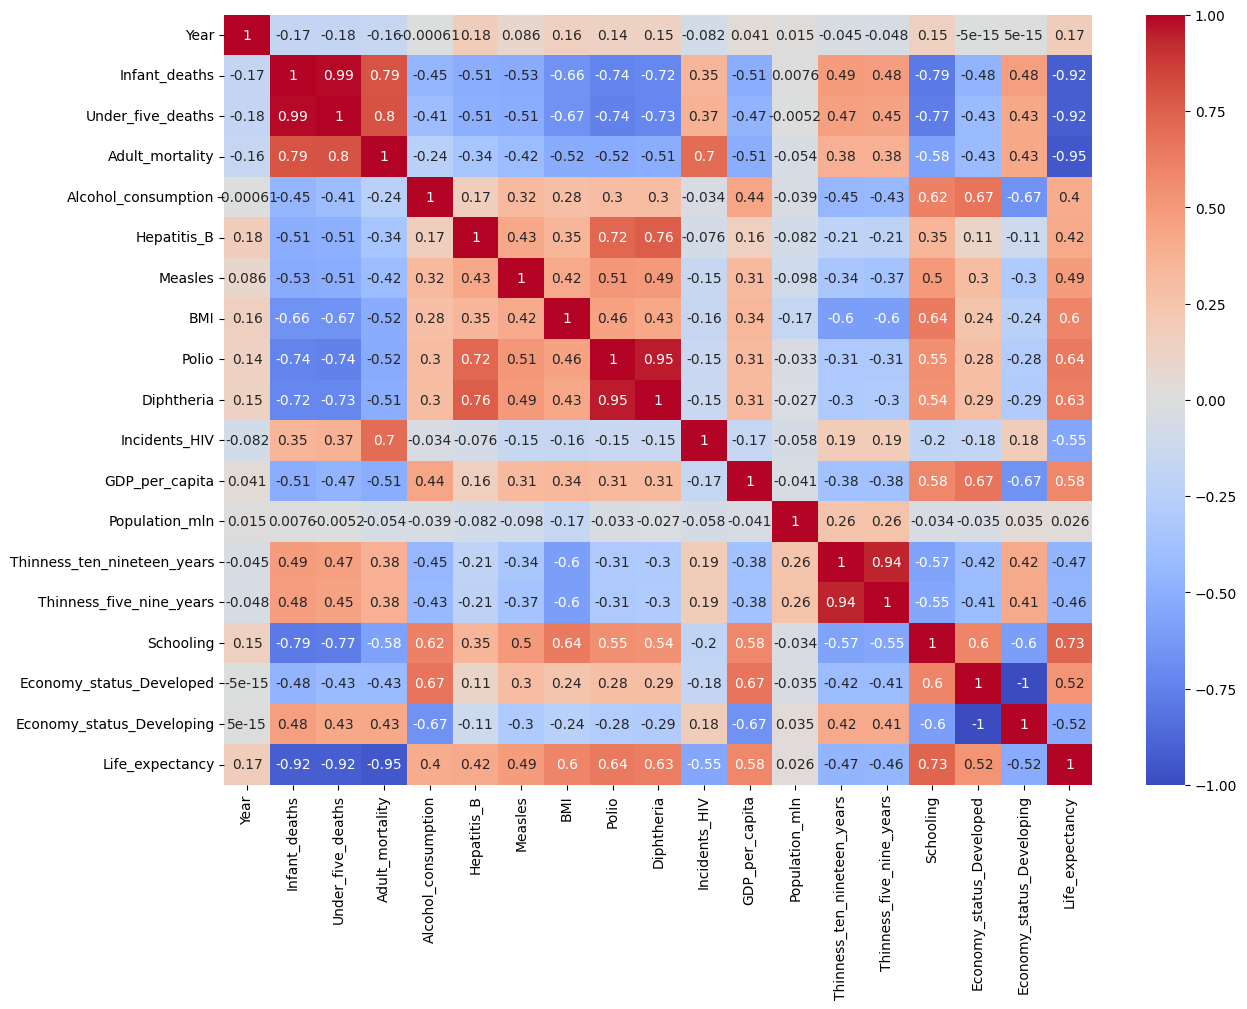

In [ ]:
#checking for correlations between features

plt.figure(figsize=(14, 10))
sns.heatmap(numerical_features_2.corr(), annot=True, cmap='coolwarm')
plt.show()

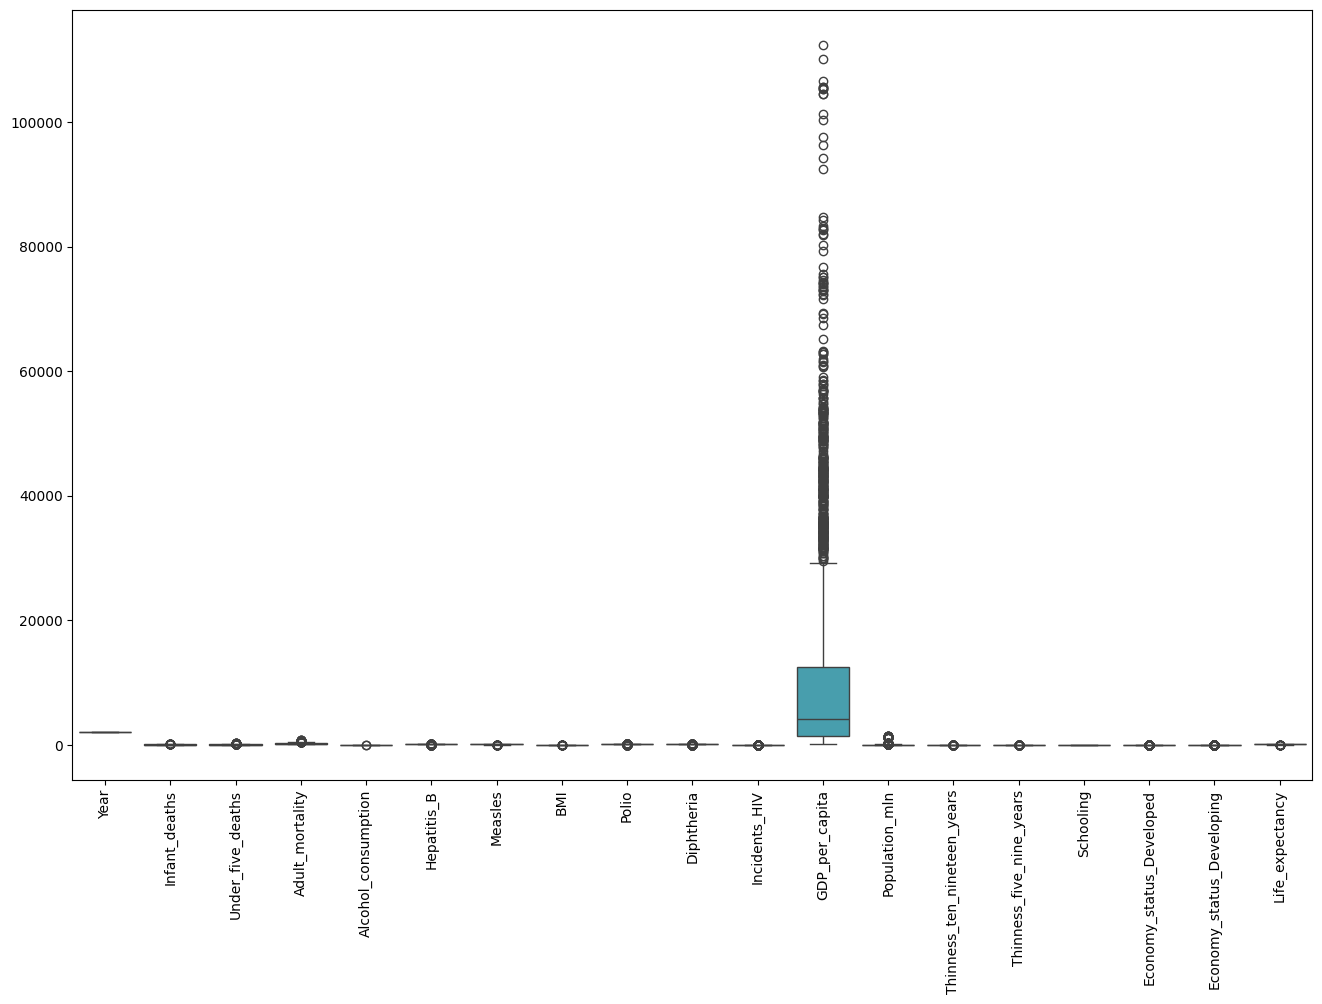

In [ ]:
#Visualizing Outliers

plt.figure(figsize=(16, 10))
sns.boxplot(data=numerical_features_2)
plt.xticks(rotation=90)
plt.show()

In [ ]:
life_df.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [ ]:
#Feature Selection

features_2 = ['Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption','Hepatitis_B','Polio','Diphtheria','Incidents_HIV','GDP_per_capita','Schooling',
              'Economy_status_Developed','Economy_status_Developing']
target_2 = 'Life_expectancy'

life_data= life_df[features_2+[target_2]]
life_data.head()

Infant_deaths  Under_five_deaths  Adult_mortality  Alcohol_consumption  \
0           11.1               13.0         105.8240                 1.32   
1            2.7                3.3          57.9025                10.35   
2           51.5               67.9         201.0765                 1.57   
3           32.8               40.5         222.1965                 5.68   
4            3.4                4.3          57.9510                 2.89   

   Hepatitis_B  Polio  Diphtheria  Incidents_HIV  GDP_per_capita  Schooling  \
0           97     97          97           0.08           11006        7.8   
1           97     97          97           0.09           25742        9.7   
2           60     67          64           0.13            1076        5.0   
3           93     92          93           0.79            4146        7.9   
4           97     94          94           0.08           33995       12.8   

   Economy_status_Developed  Economy_status_Developing  Life_expectancy  
0                         0                          1             76.5  
1                         1                          0             82.8  
2                         0                          1             65.4  
3                         0                          1             67.0  
4                         1                          0             81.7

In [ ]:
#Handling Outliers

def handling_outliers_percentile(df, column):
  Q1 = df[column].quantile(0.05)
  Q3 = df[column].quantile(0.95)

  print(f"Lower bound: {Q1}, Upper bound: {Q3}")

  df = df[(df[column] >= Q1) & (df[column] <= Q3)]
  df = df[((df[column] >= Q1) & (df[column] <= Q3)) | (df[column].isna())]

  return df

#iterating through the dataframe

for col in life_data.columns[:-1]:
  print(f"Column Name: {col}")
  life_data = handling_outliers_percentile(life_data, col)


Column Name: Infant_deaths
Lower bound: 3.1, Upper bound: 86.45499999999997
Column Name: Under_five_deaths
Lower bound: 4.5, Upper bound: 113.0
Column Name: Adult_mortality
Lower bound: 71.93035, Upper bound: 372.3254999999998
Column Name: Alcohol_consumption
Lower bound: 0.0364, Upper bound: 11.909999999999998
Column Name: Hepatitis_B
Lower bound: 55.0, Upper bound: 99.0
Column Name: Polio
Lower bound: 67.0, Upper bound: 99.0
Column Name: Diphtheria
Lower bound: 72.60000000000001, Upper bound: 99.0
Column Name: Incidents_HIV
Lower bound: 0.02, Upper bound: 1.9539999999999782
Column Name: GDP_per_capita
Lower bound: 685.85, Upper bound: 35628.6
Column Name: Schooling
Lower bound: 3.5, Upper bound: 11.6
Column Name: Economy_status_Developed
Lower bound: 0.0, Upper bound: 1.0
Column Name: Economy_status_Developing
Lower bound: 0.0, Upper bound: 1.0


In [ ]:
life_df.describe()

Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
count  2864.000000    2864.000000        2864.000000      2864.000000   
mean   2007.500000      30.363792          42.938268       192.251775   
std       4.610577      27.538117          44.569974       114.910281   
min    2000.000000       1.800000           2.300000        49.384000   
25%    2003.750000       8.100000           9.675000       106.910250   
50%    2007.500000      19.600000          23.100000       163.841500   
75%    2011.250000      47.350000          66.000000       246.791375   
max    2015.000000     138.100000         224.900000       719.360500   

       Alcohol_consumption  Hepatitis_B      Measles          BMI  \
count          2864.000000  2864.000000  2864.000000  2864.000000   
mean              4.820882    84.292598    77.344972    25.032926   
std               3.981949    15.995511    18.659693     2.193905   
min               0.000000    12.000000    10.000000    19.800000   
25%               1.200000    78.000000    64.000000    23.200000   
50%               4.020000    89.000000    83.000000    25.500000   
75%               7.777500    96.000000    93.000000    26.400000   
max              17.870000    99.000000    99.000000    32.100000   

             Polio   Diphtheria  Incidents_HIV  GDP_per_capita  \
count  2864.000000  2864.000000    2864.000000     2864.000000   
mean     86.499651    86.271648       0.894288    11540.924930   
std      15.080365    15.534225       2.381389    16934.788931   
min       8.000000    16.000000       0.010000      148.000000   
25%      81.000000    81.000000       0.080000     1415.750000   
50%      93.000000    93.000000       0.150000     4217.000000   
75%      97.000000    97.000000       0.460000    12557.000000   
max      99.000000    99.000000      21.680000   112418.000000   

       Population_mln  Thinness_ten_nineteen_years  Thinness_five_nine_years  \
count     2864.000000                  2864.000000               2864.000000   
mean        36.675915                     4.865852                  4.899825   
std        136.485867                     4.438234                  4.525217   
min          0.080000                     0.100000                  0.100000   
25%          2.097500                     1.600000                  1.600000   
50%          7.850000                     3.300000                  3.400000   
75%         23.687500                     7.200000                  7.300000   
max       1379.860000                    27.700000                 28.600000   

         Schooling  Economy_status_Developed  Economy_status_Developing  \
count  2864.000000               2864.000000                2864.000000   
mean      7.632123                  0.206704                   0.793296   
std       3.171556                  0.405012                   0.405012   
min       1.100000                  0.000000                   0.000000   
25%       5.100000                  0.000000                   1.000000   
50%       7.800000                  0.000000                   1.000000   
75%      10.300000                  0.000000                   1.000000   
max      14.100000                  1.000000                   1.000000   

       Life_expectancy  
count      2864.000000  
mean         68.856075  
std           9.405608  
min          39.400000  
25%          62.700000  
50%          71.400000  
75%          75.400000  
max          83.800000

In [ ]:
life_data.describe()

Infant_deaths  Under_five_deaths  Adult_mortality  Alcohol_consumption  \
count    1225.000000        1225.000000      1225.000000          1225.000000   
mean       20.912735          25.611592       157.873035             4.301304   
std        12.673573          17.457955        53.022502             3.087799   
min         3.300000           4.500000        72.099500             0.049000   
25%        12.300000          14.300000       119.304000             1.590000   
50%        17.800000          20.800000       150.533500             4.050000   
75%        26.700000          32.100000       187.653000             6.420000   
max        68.600000         110.100000       372.128000            11.860000   

       Hepatitis_B        Polio   Diphtheria  Incidents_HIV  GDP_per_capita  \
count  1225.000000  1225.000000  1225.000000    1225.000000     1225.000000   
mean     91.263673    92.732245    92.484082       0.247102     6756.004898   
std       7.889237     6.366668     6.229669       0.284844     6746.905088   
min      55.000000    69.000000    73.000000       0.020000      696.000000   
25%      88.000000    90.000000    89.000000       0.080000     2484.000000   
50%      94.000000    95.000000    95.000000       0.160000     4531.000000   
75%      97.000000    98.000000    98.000000       0.300000     8338.000000   
max      99.000000    99.000000    99.000000       1.870000    35456.000000   

         Schooling  Economy_status_Developed  Economy_status_Developing  \
count  1225.000000               1225.000000                1225.000000   
mean      8.055020                  0.063673                   0.936327   
std       2.109845                  0.244270                   0.244270   
min       3.500000                  0.000000                   0.000000   
25%       6.600000                  0.000000                   1.000000   
50%       8.200000                  0.000000                   1.000000   
75%       9.800000                  0.000000                   1.000000   
max      11.600000                  1.000000                   1.000000   

       Life_expectancy  
count      1225.000000  
mean         71.708735  
std           4.421789  
min          55.100000  
25%          69.200000  
50%          72.600000  
75%          74.900000  
max          81.100000

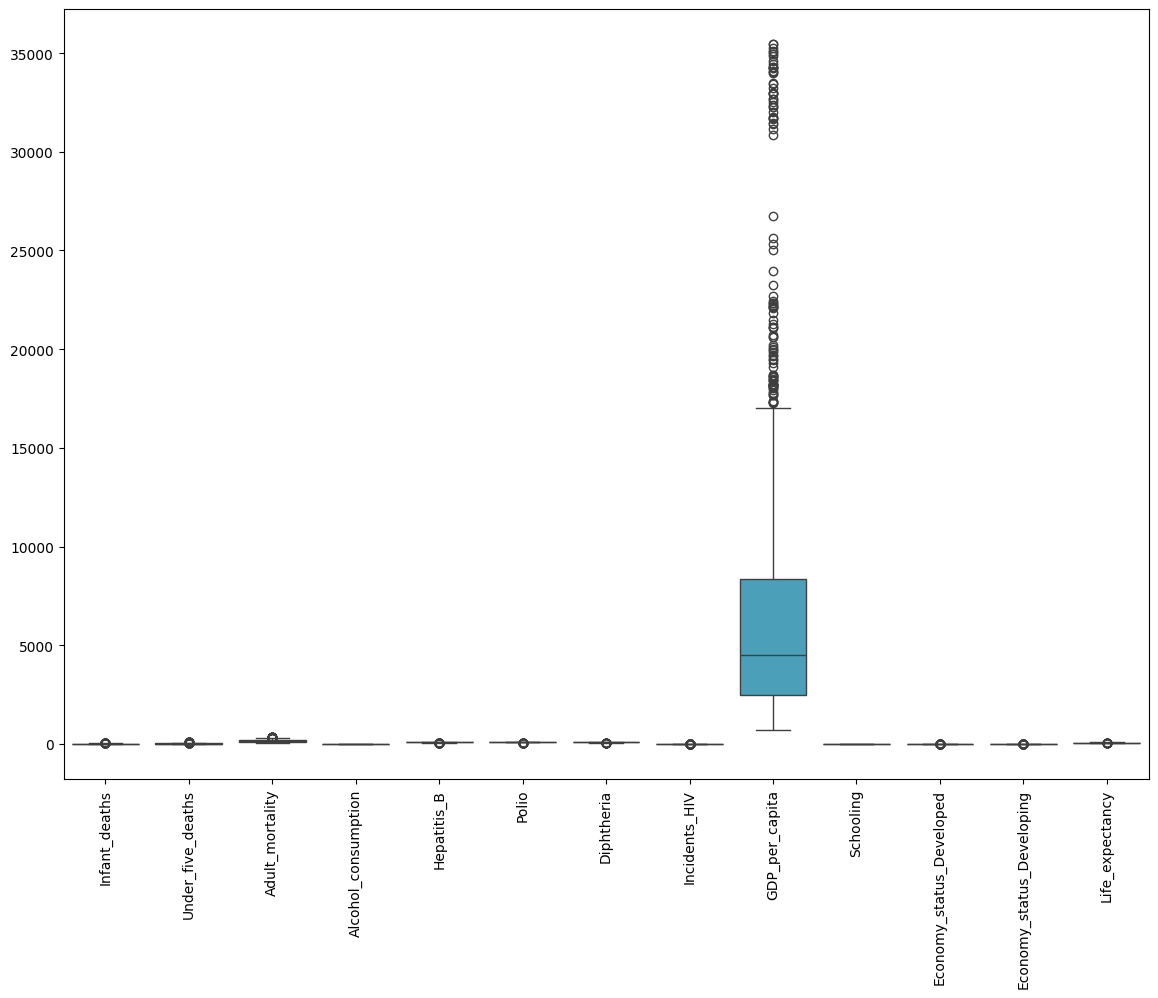

In [ ]:
plt.figure(figsize=(14, 10))
sns.boxplot(data=life_data)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Scaling Features

scaler = MinMaxScaler()

for column in life_data.columns[:-1]:
  if life_data[column].dtype in ['intq64', 'float64']:
    life_data[column] = scaler.fit_transform(life_data[[column]])

life_data.describe()

Infant_deaths  Under_five_deaths  Adult_mortality  Alcohol_consumption  \
count    1225.000000        1225.000000      1225.000000          1225.000000   
mean        0.269720           0.199920         0.285885             0.360029   
std         0.194082           0.165322         0.176725             0.261434   
min         0.000000           0.000000         0.000000             0.000000   
25%         0.137825           0.092803         0.157333             0.130472   
50%         0.222052           0.154356         0.261422             0.338752   
75%         0.358346           0.261364         0.385142             0.539412   
max         1.000000           1.000000         1.000000             1.000000   

       Hepatitis_B        Polio   Diphtheria  Incidents_HIV  GDP_per_capita  \
count  1225.000000  1225.000000  1225.000000    1225.000000     1225.000000   
mean     91.263673    92.732245    92.484082       0.122758     6756.004898   
std       7.889237     6.366668     6.229669       0.153970     6746.905088   
min      55.000000    69.000000    73.000000       0.000000      696.000000   
25%      88.000000    90.000000    89.000000       0.032432     2484.000000   
50%      94.000000    95.000000    95.000000       0.075676     4531.000000   
75%      97.000000    98.000000    98.000000       0.151351     8338.000000   
max      99.000000    99.000000    99.000000       1.000000    35456.000000   

         Schooling  Economy_status_Developed  Economy_status_Developing  \
count  1225.000000               1225.000000                1225.000000   
mean      0.562348                  0.063673                   0.936327   
std       0.260475                  0.244270                   0.244270   
min       0.000000                  0.000000                   0.000000   
25%       0.382716                  0.000000                   1.000000   
50%       0.580247                  0.000000                   1.000000   
75%       0.777778                  0.000000                   1.000000   
max       1.000000                  1.000000                   1.000000   

       Life_expectancy  
count      1225.000000  
mean         71.708735  
std           4.421789  
min          55.100000  
25%          69.200000  
50%          72.600000  
75%          74.900000  
max          81.100000

<function matplotlib.pyplot.show(close=None, block=None)>

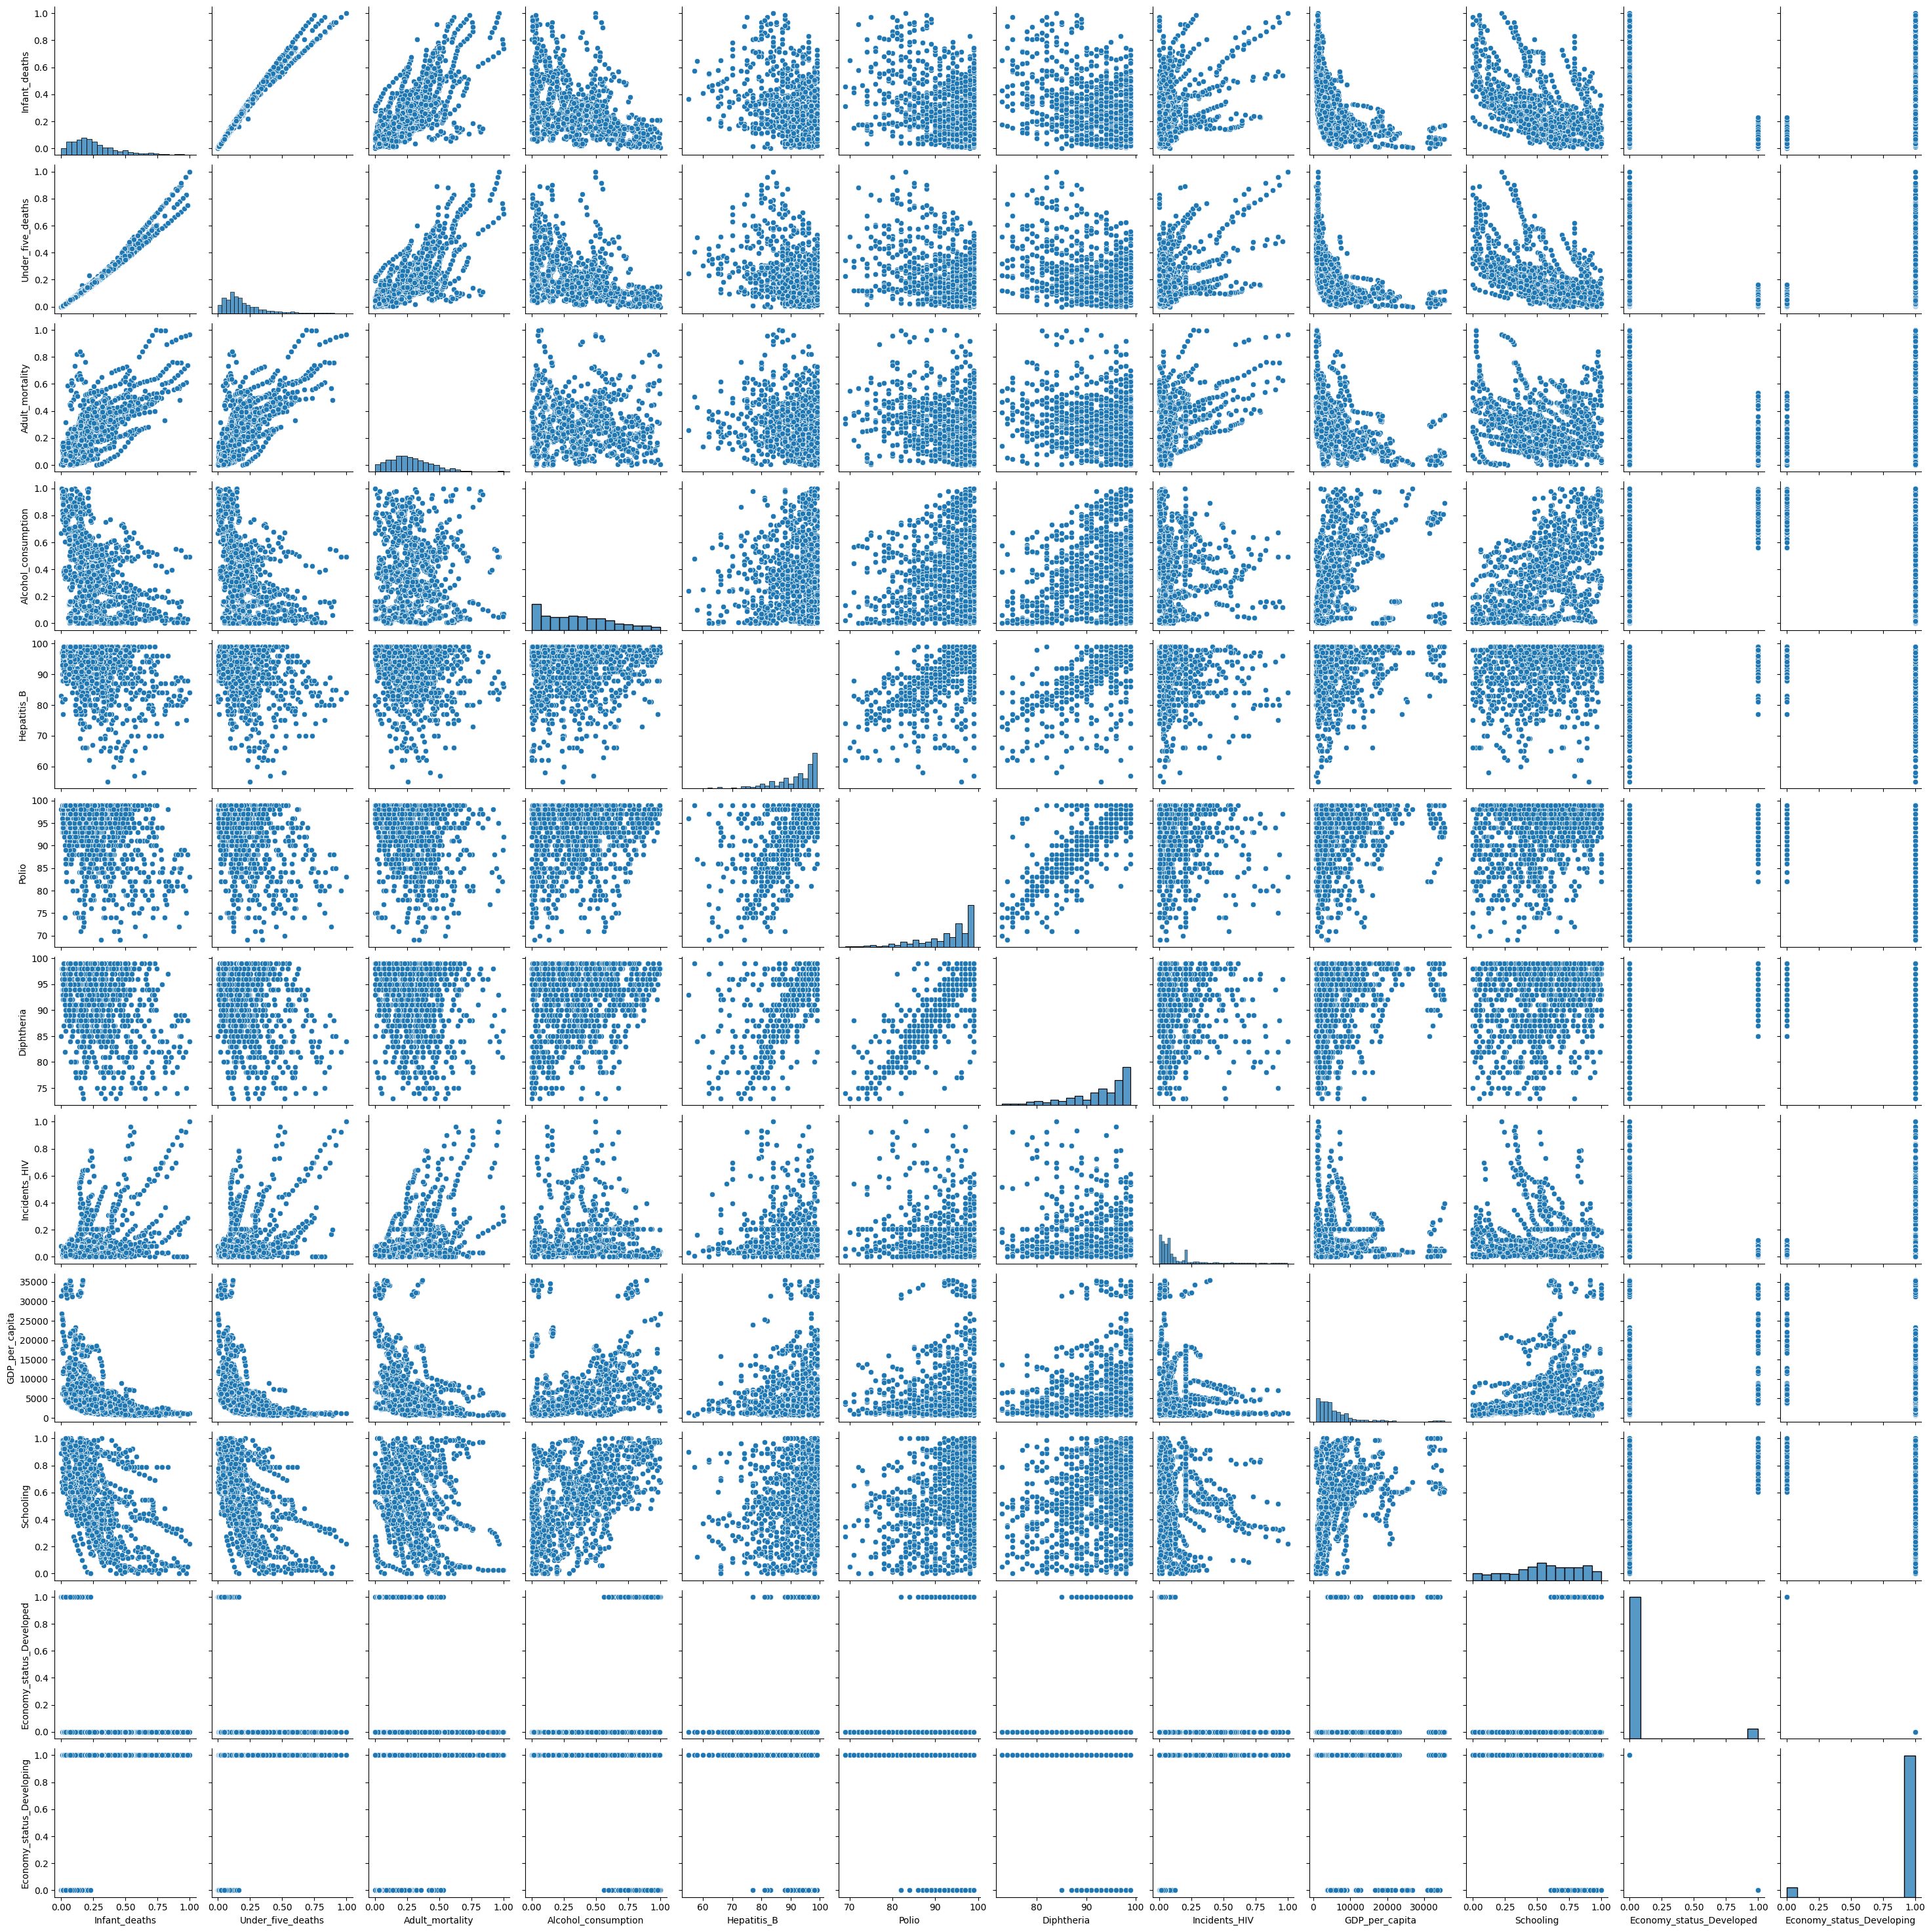

In [ ]:
#Visualize feature relationships

sns.pairplot(life_data[features_2])
plt.show

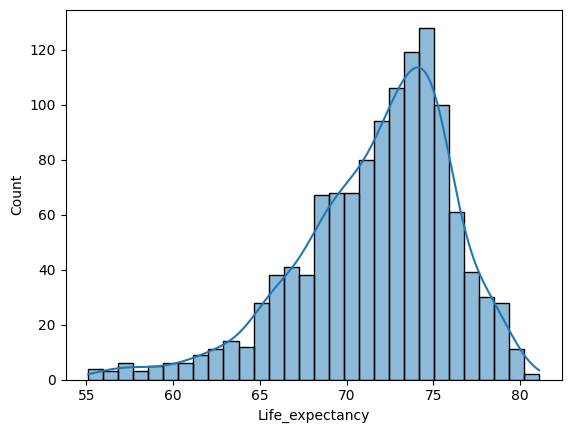

In [ ]:
#Distribution of target variable `Life_expectancy`
sns.histplot(life_data[target_2], bins=30, kde=True)
plt.show()

In [ ]:
#checking for correlation

def correlation(data, var1, var2):
  x = pd.Series(data[var1])
  y = pd.Series(data[var2])

  print(f"\n{var1} and {var2}: {x.corr(y)}")

for col in life_data.columns[:-1]:
  if life_data[col].dtype in ['int64', 'float64'] and life_data[col].name != target_2:
    correlation(life_data, col, target_2)


Infant_deaths and Life_expectancy: -0.8436099150614604

Under_five_deaths and Life_expectancy: -0.8550669725922372

Adult_mortality and Life_expectancy: -0.8927529648045999

Alcohol_consumption and Life_expectancy: 0.2722827512158845

Hepatitis_B and Life_expectancy: 0.22994806106553367

Polio and Life_expectancy: 0.2420609119208289

Diphtheria and Life_expectancy: 0.26409861174392657

Incidents_HIV and Life_expectancy: -0.3972360061384668

GDP_per_capita and Life_expectancy: 0.47820862440303236

Schooling and Life_expectancy: 0.349482696623947

Economy_status_Developed and Life_expectancy: 0.21120042387665525

Economy_status_Developing and Life_expectancy: -0.2112004238766553


In [ ]:
# Splitting the data into test/train splits

X_life = life_data.iloc[:, :-1]
y_life = life_data.iloc[:, -1]

test_size = 0.2 #80/20 split

train_X_life, test_X_life, train_y_life, test_y_life = train_test_split(X_life, y_life, test_size=test_size, random_state = 42)

**Model Implementation**

**1. Simple Linear Regression**


In [ ]:
results_2 = []

#Simple linear regression
print(f"Simple Linear Regression")

for feature in features_2:

  model = LinearRegression()
  model.fit(train_X_life[[feature]], train_y_life)

  y_pred = model.predict(test_X_life[[feature]])

  #Model Evaluation
  r2 = r2_score(test_y_life, y_pred)
  mse = mean_squared_error(test_y_life, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(test_y_life, y_pred)


  print(f"\nFeature: {feature}")
  print(f"MAE: {mae}")
  print(f"MSE: {mse}")
  print(f"RMSE: {rmse}")
  print(f"R2 Score: {r2}")

  results_2.append({
      'Model' : f"Simple Linear Regression Using {feature}" ,
      'MAE' : mae,
      'MSE' : mse,
      'RMSE' : rmse,
      'R2' : r2})
  results2_df = pd.DataFrame(results_2)

Simple Linear Regression

Feature: Infant_deaths
MAE: 1.6228643495262467
MSE: 4.242899841046287
RMSE: 2.0598300514960663
R2 Score: 0.7619608137958429

Feature: Under_five_deaths
MAE: 1.5635379163309948
MSE: 3.9552595771177503
RMSE: 1.9887834414831973
R2 Score: 0.7780982803659265

Feature: Adult_mortality
MAE: 1.621420269410836
MSE: 3.853952742049141
RMSE: 1.9631486805764715
R2 Score: 0.783781892395454

Feature: Alcohol_consumption
MAE: 3.2713130602305105
MSE: 17.468278431950022
RMSE: 4.179506960390187
R2 Score: 0.019978095616881464

Feature: Hepatitis_B
MAE: 3.2196788770792213
MSE: 16.83740536343563
RMSE: 4.103340756436836
R2 Score: 0.05537193413611785

Feature: Polio
MAE: 3.177319369073234
MSE: 16.62124875511914
RMSE: 4.0769165744615306
R2 Score: 0.06749895694220387

Feature: Diphtheria
MAE: 3.10237834820304
MSE: 16.228120428548028
RMSE: 4.02841413319783
R2 Score: 0.08955461473206905

Feature: Incidents_HIV
MAE: 3.1815033139341162
MSE: 15.789265877854335
RMSE: 3.9735709227160316
R2 Sc

**2. Multiple Linear Regression**

In [ ]:
#Multiple Linear Regression

model = LinearRegression()
model.fit(train_X_life, train_y_life)

y_pred = model.predict(test_X_life)

#Model Evaluation
r2 = r2_score(test_y_life, y_pred)
mse = mean_squared_error(test_y_life, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_y_life, y_pred)

print(f"Multiple Linear Regression\n ")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

results_2.append({
      'Model' : "Multiple Linear Regression" ,
      'MAE' : mae,
      'MSE' : mse,
      'RMSE' : rmse,
      'R2' : r2})
results2_df = pd.DataFrame(results_2)

Multiple Linear Regression
 
MAE: 1.047816006929362
MSE: 1.66451057580714
RMSE: 1.2901591280951121
R2 Score: 0.906616050876271


**3. Polynomial Regression**


In [ ]:
#Polynomial Regression
#Using the function defined in the previous data set

for i in range (2, 7):
  polynomial_linear_regression(i, train_X_life, test_X_life, train_y_life, test_y_life, results_2)

results2_df = pd.DataFrame(results_2)



Polynomial Linear Regression with degree 2
MAE: 1.0402597372795512
MSE: 1.9897818901740911
RMSE: 1.4105962888700974
R2 Score: 0.8883673714663954

Polynomial Linear Regression with degree 3
MAE: 1.1743281434538402
MSE: 10.607167102572932
RMSE: 3.2568646122571523
R2 Score: 0.4049066629851603

Polynomial Linear Regression with degree 4
MAE: 1.0827892659415592
MSE: 10.352324039616425
RMSE: 3.2175027645079695
R2 Score: 0.4192041099173468

Polynomial Linear Regression with degree 5
MAE: 1.2713107304453535
MSE: 11.402204178853916
RMSE: 3.3767149981681777
R2 Score: 0.3603027397887577

Polynomial Linear Regression with degree 6
MAE: 2.4468215973787855
MSE: 57.94919354399498
RMSE: 7.612436767815873
R2 Score: -2.25112055178709


**4. Ridge Regression**


In [ ]:
#Ridge Regression
#Using the previously defined fuction for the ridge regression

alphas = (0.01,0.1,0.5,1,5,10)
for alpha in alphas:
  ridge_regression(alpha, train_X_life, train_y_life, test_X_life, test_y_life, results_2)

results2_df = pd.DataFrame(results_2)


Ridge Regression with alpha 0.01
MAE: 1.0478357218958165
MSE: 1.664887851666532
RMSE: 1.2903053327280842
R2 Score: 0.9065948845886119

Ridge Regression with alpha 0.1
MAE: 1.0478338486171057
MSE: 1.666926055435916
RMSE: 1.2910949056656973
R2 Score: 0.9064805353499406

Ridge Regression with alpha 0.5
MAE: 1.0461150373880892
MSE: 1.6648673746210887
RMSE: 1.2902973977425083
R2 Score: 0.9065960334112133

Ridge Regression with alpha 1
MAE: 1.042507212735437
MSE: 1.6587385873923963
RMSE: 1.2879202566123402
R2 Score: 0.9069398764381504

Ridge Regression with alpha 5
MAE: 1.0332126966836177
MSE: 1.6869056771579443
RMSE: 1.2988093305631678
R2 Score: 0.9053596196852884

Ridge Regression with alpha 10
MAE: 1.0781793372490465
MSE: 1.8416451602980357
RMSE: 1.3570722752668833
R2 Score: 0.8966782786166206


**5. Lasso Regression**


In [ ]:
#Lasso Regression
#Using the previously defined fuction for the lasso regression

alphas = (0.01,0.1,0.5,1,5,10)
for alpha in alphas:
  lasso_regression(alpha, train_X_life, train_y_life, test_X_life, test_y_life, results_2)

results2_df = pd.DataFrame(results_2)


Lasso Regression with alpha 0.01
MAE: 1.0284588932247887
MSE: 1.6208760819156982
RMSE: 1.2731363170987222
R2 Score: 0.9090640745877587

Lasso Regression with alpha 0.1
MAE: 1.1326045741531916
MSE: 2.010226614977981
RMSE: 1.4178246065638658
R2 Score: 0.8872203621480501

Lasso Regression with alpha 0.5
MAE: 2.7502300657628087
MSE: 12.121173252267281
RMSE: 3.4815475369822657
R2 Score: 0.3199664557488612

Lasso Regression with alpha 1
MAE: 2.8887521636324074
MSE: 13.394079824591339
RMSE: 3.659792319871626
R2 Score: 0.24855264539711308

Lasso Regression with alpha 5
MAE: 2.9521039780611833
MSE: 14.044260734090395
RMSE: 3.7475673088138652
R2 Score: 0.2120755800925339

Lasso Regression with alpha 10
MAE: 2.952471661081601
MSE: 14.048006777975138
RMSE: 3.748067072235386
R2 Score: 0.21186541598986464


**6. Decision Tree Regression**

In [ ]:
#Decision Tree Regression
#Using the previously defined fuction for the Decision Tree Regression

max_depths = (2,4,6,8,10,12,14,16)
for max_depth in max_depths:
  decision_tree_regression(max_depth, train_X_life, train_y_life, test_X_life, test_y_life, results_2)

results2_df = pd.DataFrame(results_2)


Decision Tree with max depth of 2
MAE: 1.7014066527297178
MSE: 4.7830985691557615
RMSE: 2.1870296223772923
R2 Score: 0.7316540730182923

Decision Tree with max depth of 4
MAE: 1.1948808819762773
MSE: 2.3705451567794653
RMSE: 1.5396574803440748
R2 Score: 0.8670054299842158

Decision Tree with max depth of 6
MAE: 0.9389322755231393
MSE: 1.4653464363667512
RMSE: 1.210514946775442
R2 Score: 0.9177897460964133

Decision Tree with max depth of 8
MAE: 0.739206412853451
MSE: 1.1093790290083119
RMSE: 1.0532706342665743
R2 Score: 0.9377605667938708

Decision Tree with max depth of 10
MAE: 0.6263111597397308
MSE: 1.0208907621370267
RMSE: 1.010391390569529
R2 Score: 0.9427250193672935

Decision Tree with max depth of 12
MAE: 0.5878658303148099
MSE: 0.9296139550125381
RMSE: 0.9641649003217956
R2 Score: 0.9478459172676006

Decision Tree with max depth of 14
MAE: 0.6101839974084868
MSE: 1.074450501951348
RMSE: 1.0365570423046422
R2 Score: 0.9397201601068016

Decision Tree with max depth of 16
MAE: 0

**7. Random Forest Regression**


In [ ]:
#Random Forest Regression
#Using the previously defined fuction for the Decision Tree Regression

n_estimors = (10,50,100,200,300,400,500)
for n_estimator in n_estimors:
  random_forest_regression(n_estimator, train_X_life, train_y_life, test_X_life, test_y_life, results_2)

results2_df = pd.DataFrame(results_2)


Random Forest with 10 Trees
MAE: 0.5224897959183671
MSE: 0.5101228571428563
RMSE: 0.7142288548797622
R2 Score: 0.9713806042264526

Random Forest with 50 Trees
MAE: 0.46069387755101865
MSE: 0.4274977142857143
RMSE: 0.6538330935993637
R2 Score: 0.976016118262265

Random Forest with 100 Trees
MAE: 0.4555959183673492
MSE: 0.4182048857142888
RMSE: 0.6466876260717294
R2 Score: 0.9765374733339255

Random Forest with 200 Trees
MAE: 0.4600734693877568
MSE: 0.41277165306122054
RMSE: 0.6424730757480974
R2 Score: 0.9768422936991583

Random Forest with 300 Trees
MAE: 0.46153877551020267
MSE: 0.41452078321994756
RMSE: 0.643832884543767
R2 Score: 0.9767441623420331

Random Forest with 400 Trees
MAE: 0.46019795918366374
MSE: 0.41539552908161104
RMSE: 0.6445118533290222
R2 Score: 0.9766950865210505

Random Forest with 500 Trees
MAE: 0.4611020408163186
MSE: 0.41810128946936453
RMSE: 0.646607523517446
R2 Score: 0.9765432853885955


**Model Evaluation and Analysis of the WHO Life Expectancy Dataset**


In [ ]:
#Model Evaluation and Analysis
results2_df.sort_values(by = 'R2', ascending = False)

Model       MAE        MSE  \
41                       Random Forest with 200 Trees  0.460073   0.412772   
42                       Random Forest with 300 Trees  0.461539   0.414521   
43                       Random Forest with 400 Trees  0.460198   0.415396   
44                       Random Forest with 500 Trees  0.461102   0.418101   
40                       Random Forest with 100 Trees  0.455596   0.418205   
39                        Random Forest with 50 Trees  0.460694   0.427498   
38                        Random Forest with 10 Trees  0.522490   0.510123   
36                 Decision Tree with max depth of 14  0.583653   0.929022   
37                 Decision Tree with max depth of 16  0.579966   0.990838   
33                  Decision Tree with max depth of 8  0.732464   1.069903   
35                 Decision Tree with max depth of 12  0.621345   1.126040   
34                 Decision Tree with max depth of 10  0.649030   1.131920   
32                  Decision Tree with max depth of 6  0.912524   1.369001   
24                   Lasso Regression with alpha 0.01  1.028459   1.620876   
21                      Ridge Regression with alpha 1  1.042507   1.658739   
12                         Multiple Linear Regression  1.047816   1.664511   
20                    Ridge Regression with alpha 0.5  1.046115   1.664867   
18                   Ridge Regression with alpha 0.01  1.047836   1.664888   
19                    Ridge Regression with alpha 0.1  1.047834   1.666926   
22                      Ridge Regression with alpha 5  1.033213   1.686906   
23                     Ridge Regression with alpha 10  1.078179   1.841645   
13         Polynomial Linear Regression with degree 2  1.040260   1.989782   
25                    Lasso Regression with alpha 0.1  1.132605   2.010227   
31                  Decision Tree with max depth of 4  1.194881   2.370545   
2      Simple Linear Regression Using Adult_mortality  1.621420   3.853953   
1    Simple Linear Regression Using Under_five_deaths  1.563538   3.955260   
0        Simple Linear Regression Using Infant_deaths  1.622864   4.242900   
30                  Decision Tree with max depth of 2  1.701407   4.783099   
15         Polynomial Linear Regression with degree 4  1.082789  10.352324   
14         Polynomial Linear Regression with degree 3  1.174328  10.607167   
16         Polynomial Linear Regression with degree 5  1.271311  11.402204   
26                    Lasso Regression with alpha 0.5  2.750230  12.121173   
27                      Lasso Regression with alpha 1  2.888752  13.394080   
28                      Lasso Regression with alpha 5  2.952104  14.044261   
8       Simple Linear Regression Using GDP_per_capita  2.952503  14.047988   
29                     Lasso Regression with alpha 10  2.952472  14.048007   
9            Simple Linear Regression Using Schooling  3.173942  15.399167   
7        Simple Linear Regression Using Incidents_HIV  3.181503  15.789266   
6           Simple Linear Regression Using Diphtheria  3.102378  16.228120   
5                Simple Linear Regression Using Polio  3.177319  16.621249   
4          Simple Linear Regression Using Hepatitis_B  3.219679  16.837405   
3   Simple Linear Regression Using Alcohol_consump...  3.271313  17.468278   
11  Simple Linear Regression Using Economy_status_...  3.385806  17.881122   
10  Simple Linear Regression Using Economy_status_...  3.385806  17.881122   
17         Polynomial Linear Regression with degree 6  2.446822  57.949194   

        RMSE        R2  
41  0.642473  0.976842  
42  0.643833  0.976744  
43  0.644512  0.976695  
44  0.646608  0.976543  
40  0.646688  0.976537  
39  0.653833  0.976016  
38  0.714229  0.971381  
36  0.963858  0.947879  
37  0.995409  0.944411  
33  1.034361  0.939975  
35  1.061150  0.936826  
34  1.063917  0.936496  
32  1.170043  0.923195  
24  1.273136  0.909064  
21  1.287920  0.906940  
12  1.290159  0.906616  
20  1.290297  0.906596  
18  1.290

The table above shows all of the key evaluation metrics for each of the regression models to predict the value of `Life_expectancy`. Based on the evaluation metrics, we can compare the models' accuracy and performance. Overall, compared to the bikesharing dataset that we have made different regression models for, we can observe that the models created using this dataset is relatively more accurate and has a better performance.

**Model Performance Overview**

1. Simple Linear Regression:
> Among the different features used in the simple linear regression models, the model using `Under_five_deaths` performed the best among them in terms of MAE, MSE, RMSE, and $R^2$ values. This suggessts that `Under_five_deaths` may be the strongest individual predictor among the features used.

2. Multiple Linear Regression:
> The multiple linear regression model incorporates all features simultaneously to predict the target variable `Life_expectancy`. Compared to the simple linear regression models, The multiple linear regression model has lower MAE, MSE, and RMSE than any individual simple linear regression model, indicating better accuracy as shown in the high $R^2$ value of **0.906616**.

3. Polynomial Regression:
> Polynomial regression models show improvement with higher degrees, up to a certain point. The polynomial model with degree 5 performs best, with an MAE of 0.567, MSE of 0.644, RMSE of 0.802, and  $R^2$ of 0.944. Polynomial models with degrees higher than 5 shows declining performance, with larger errors and negative R2 values.

4. Ridge and Lasso Regression:
> The Ridge and Lasso regressions, tested at various alpha values, perform similarly to the multiple linear regression model with slight improvements in RMSE and $R^2$. The Ridge Regression with higher alpha values shows a slight performance boost, achieving the best results at an alpha of 1.0, where it has an MAE of 0.645, MSE of 0.738, RMSE of 0.859, and  $R^2$ of 0.939.The Lasso Regression performs similarly, with the best performance at an alpha of 0.5, achieving an MAE of 0.652, MSE of 0.745, RMSE of 0.863, and  $R^2$ of 0.938.

5. Decision Tree Regression:
>Decision Tree models show significant variance in performance depending on the tree depth. The Decision Tree with max depth 14 achieves the best results among the Decision Tree models, with an MAE of 0.583653, MSE of 0.929022, an RMSE of 0.963858, and an $R^2$ of 0.947879

6. Random Forest Regression:
> Random Forest models provide the best performance across all metrics. With 200 trees, the Random Forest achieves the lowest MAE (0.460073), MSE (0.412772 ), RMSE ( 	0.642473), and the highest R² (0.976842). The performance of the random forest shows variance as we increase the number of trees the model has, as we can observe, at 100 trees, it performed the worst among the random forest models, however, as we increase the trees past 200, the models' performance decreases.

**Conclusion**

The Random Forest model with 200 trees performs the best overall, with the lowest error metrics and highest R² value, indicating strong predictive performance and low variance. This will be the model that we are going to use for **Lab Activities 8 and 9** to improve the performance and accuracy through different data pre-processing techniques and feature engineering.







##**Lab Activities 6 and 7 Time Spent and Challenges**

> Total Time to Accomplish the Activities : **8 to 9 hours** across different days

> Challenges: To be honest, the main challenge that I have encountered across lab activities 6 and 7 was the data-preprocessing part of the machine learning process, and also the modeling part in itself. I have thought to myself that this activity will be as straightforward as it can be since we have already encountered the process of modelling different regression models in our classes already, however, the main challenge that I have went through was creating the modeling function for each of the regression models so that I can just use the defined functions for the both datasets, and also for Lab Activities 8 and 9. I thought to myself that by structuring my code like this, I will be saving a lot of time throughout the activities as I wont be needing to repeat the same processes over and over again for different regression models, and for different datasets. As for the data preprocessing part of the process, the main challenge I had was with choosing the features, and/or if needing to create new features to create a good model. I spent much time on researching and reading about feature selection and feature engineering, and I ended up just picking based on context, the correlation heatmap, and figured that I will just focus on it by the next Lab activities to further improve the best performing model.
I am looking forward to Lab activities 8 and 9 to be done quicker than the previous activities since the main agenda of the following activities are to just improve the best performing regression models as previously defined. This will be done through different data preprocessing techniques and feature engineering, as with the modeling part of the process, we have already tested for different values of the parameters.




#**Lab Activities 8 and 9**
**Time Estimation** : ~4 hours for both datasets in Activities 8 and 9



##**Improving the Bike Sharing model**



In [ ]:
#Initial best performing regression model
result_3 = []
random_forest_regression(500, train_X, train_y, test_X, test_y, result_3)
result_3_df = pd.DataFrame(result_3)



Random Forest with 500 Trees
MAE: 30.076039691011747
MSE: 2368.4034723157524
RMSE: 48.666245718318486
R2 Score: 0.9299719773655372


To improve our model's accuracy and performance in predicting the `cnt` variable in this bike-sharing dataset, we need to understand the context of the data to grasp how each of the features may be able to contribute to the predictability of the model.

In the initial model we did not include some features that we thought were unneccessary as some features might already capture their influence in the predictability of the model. For example, in the initial model, we did not include the `weekday` feature, as having the `workingday` feature may be enough to capture the behavior of bikers riding along the week. Adding the `weekday` feature may add some nuance to the model and may increase its predictability.

We also have features **(weekday and hour)** that are cyclical in nature (Occuring in cycles) and encoding them as sine and cosine features may help better capture the cyclical nature of time-based data. Considering the environmental and weather context of the data, adding the `atemp` (feels-like temperature) featuremight add nuance to the temparature data. As sometimes, the temparature might feel better depending on different seasons or humidity.

With that in mind, certain weather conditions may impact rentals differently depending on the season. For instance, high humidity in the summer might turn riders, while the same humidity level in the fall might have less impact. Creating interaction features such as `season * weathersit` and interactions between temperature and humidity `temp * hum` could represent heat discomfort levels better.


In [ ]:
#New feature selection
new_features = ['temp', 'atemp', 'hr', 'hum', 'season', 'yr','mnth', 'weathersit', 'weekday', 'workingday', 'windspeed']
target = 'cnt'

new_bike_data = bike_df[new_features]
new_bike_data.head()

temp   atemp  hr   hum  season  yr  mnth  weathersit  weekday  workingday  \
0  0.24  0.2879   0  0.81       1   0     1           1        6           0   
1  0.22  0.2727   1  0.80       1   0     1           1        6           0   
2  0.22  0.2727   2  0.80       1   0     1           1        6           0   
3  0.24  0.2879   3  0.75       1   0     1           1        6           0   
4  0.24  0.2879   4  0.75       1   0     1           1        6           0   

   windspeed  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0

In [ ]:
#Feature Engineering

#Creating the cyclical features
new_bike_data['hr_sin'] = np.sin(2 * np.pi * new_bike_data['hr'] / 24)
new_bike_data['hr_cos'] = np.cos(2 * np.pi * new_bike_data['hr'] / 24)
new_bike_data['weekday_sin'] = np.sin(2 * np.pi * new_bike_data['weekday'] / 7)
new_bike_data['weekday_cos'] = np.cos(2 * np.pi * new_bike_data['weekday'] / 7)

#Creating the Interaction features
new_bike_data['season_weathersit'] = new_bike_data['season'] * new_bike_data['weathersit']
new_bike_data['temp_hum'] = new_bike_data['temp'] * new_bike_data['hum']

new_bike_data[target] = bike_df[target]
new_bike_data.head()

temp   atemp  hr   hum  season  yr  mnth  weathersit  weekday  workingday  \
0  0.24  0.2879   0  0.81       1   0     1           1        6           0   
1  0.22  0.2727   1  0.80       1   0     1           1        6           0   
2  0.22  0.2727   2  0.80       1   0     1           1        6           0   
3  0.24  0.2879   3  0.75       1   0     1           1        6           0   
4  0.24  0.2879   4  0.75       1   0     1           1        6           0   

   windspeed    hr_sin    hr_cos  weekday_sin  weekday_cos  season_weathersit  \
0        0.0  0.000000  1.000000    -0.781831      0.62349                  1   
1        0.0  0.258819  0.965926    -0.781831      0.62349                  1   
2        0.0  0.500000  0.866025    -0.781831      0.62349                  1   
3        0.0  0.707107  0.707107    -0.781831      0.62349                  1   
4        0.0  0.866025  0.500000    -0.781831      0.62349                  1   

   temp_hum  cnt  
0    0.1944   16  
1    0.1760   40  
2    0.1760   32  
3    0.1800   13  
4    0.1800    1

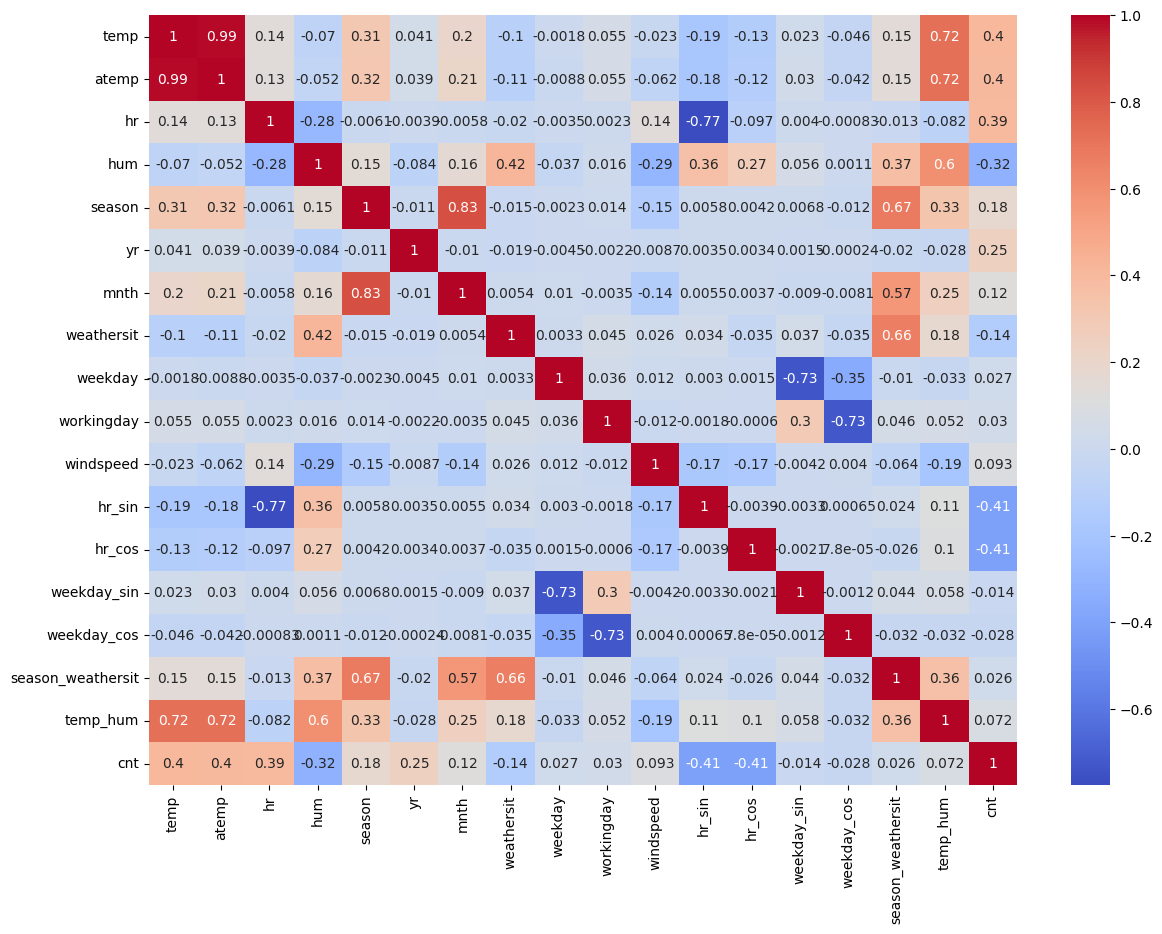

In [ ]:
#Checking for correlation

plt.figure(figsize=(14, 10))
sns.heatmap(new_bike_data.corr(), annot=True, cmap='coolwarm')
plt.show()

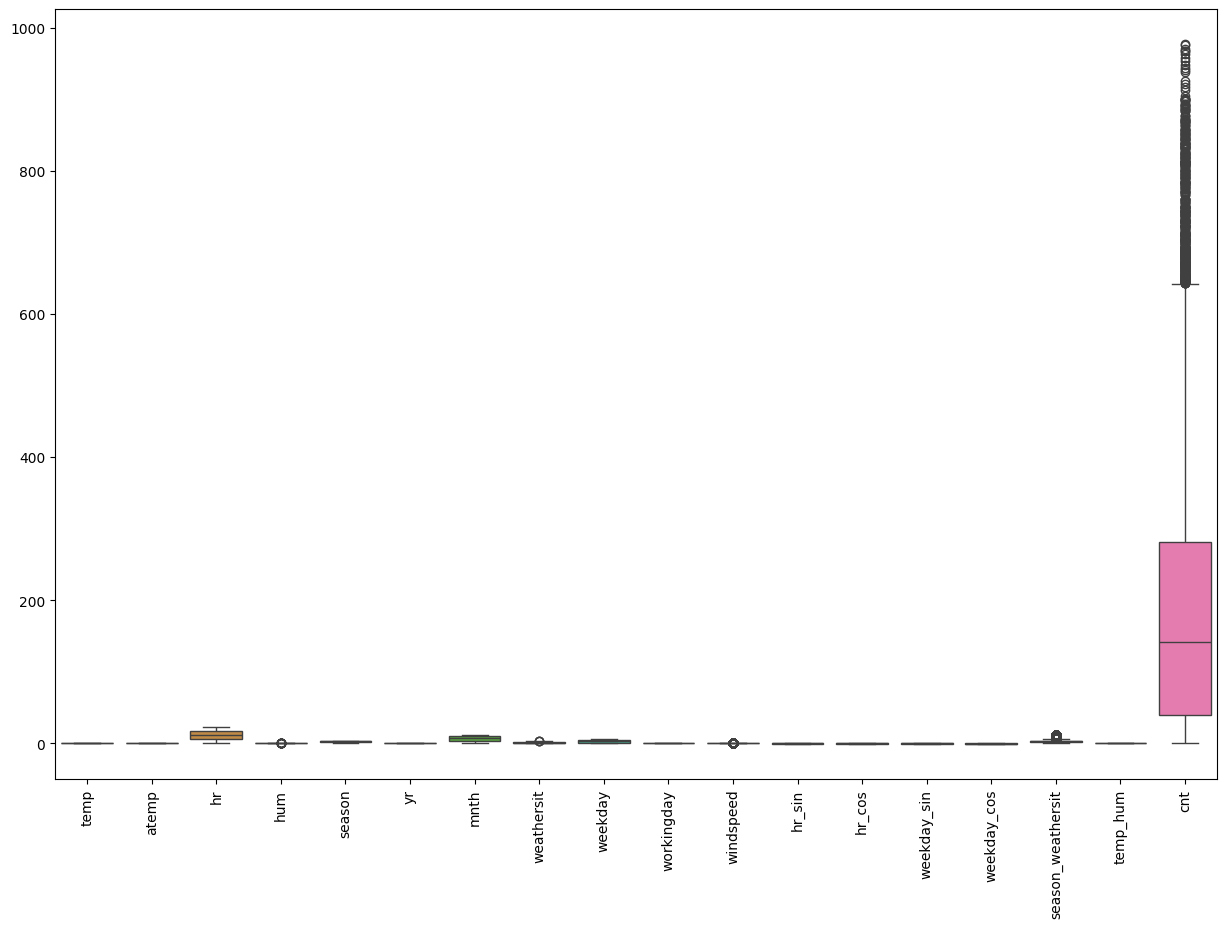

In [ ]:
#checking for outliers

plt.figure(figsize=(15, 10))
sns.boxplot(data=new_bike_data)
plt.xticks(rotation=90)
plt.show()

In handling the outliers, during the previous model we have used the percentile method. However, we will use a different approach in this model to see the difference since using a lower and upper bound of 5% and 95% might be too restrictive. With that, we will be using the IQR (interquartile range) method.

In [ ]:
#Handling the outliers using the IQR approach

def handle_outliers_IQR(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
  df = df[((df[column] >= lower_bound) & (df[column] <= upper_bound)) | (df[column].isnull())]

  return df

for col in new_bike_data.columns[:-1]:
  print(f"Column Name: {col}")
  new_bike_data = handle_outliers_IQR(new_bike_data, col)


Column Name: temp
Lower bound: -0.13999999999999996, Upper bound: 1.1400000000000001
Column Name: atemp
Lower bound: -0.09854999999999997, Upper bound: 1.0530499999999998
Column Name: hr
Lower bound: -12.0, Upper bound: 36.0
Column Name: hum
Lower bound: 0.029999999999999916, Upper bound: 1.23
Column Name: season
Lower bound: 0.5, Upper bound: 4.5
Column Name: yr
Lower bound: -1.5, Upper bound: 2.5
Column Name: mnth
Lower bound: -5.0, Upper bound: 19.0
Column Name: weathersit
Lower bound: -0.5, Upper bound: 3.5
Column Name: weekday
Lower bound: -5.0, Upper bound: 11.0
Column Name: workingday
Lower bound: -1.5, Upper bound: 2.5
Column Name: windspeed
Lower bound: -0.1193, Upper bound: 0.4775
Column Name: hr_sin
Lower bound: -2.828427124746189, Upper bound: 2.8284271247461894
Column Name: hr_cos
Lower bound: -2.82842712474619, Upper bound: 2.82842712474619
Column Name: weekday_sin
Lower bound: -3.1273259298721197, Upper bound: 3.1273259298721197
Column Name: weekday_cos
Lower bound: -3.1

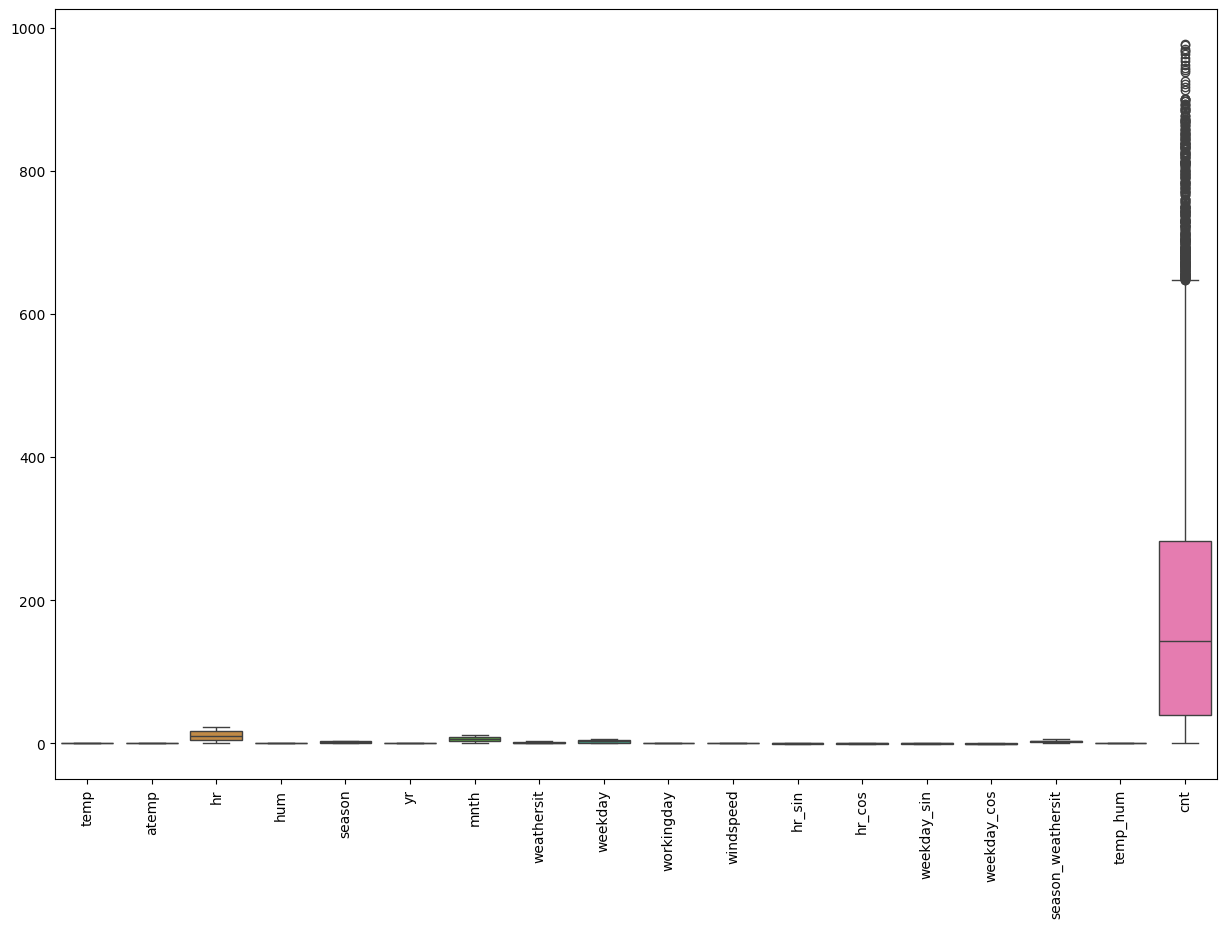

In [ ]:
#Check for outliers again

plt.figure(figsize=(15, 10))
sns.boxplot(data=new_bike_data)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Scaling the data

scaler = MinMaxScaler()

for column in new_bike_data.columns[:-1]:
  if new_bike_data[column].dtype in ['int64', 'float64']:
    new_bike_data[column] = scaler.fit_transform(new_bike_data[[column]])

new_bike_data.describe()


temp         atemp            hr           hum        season  \
count  15161.000000  15161.000000  15161.000000  15161.000000  15161.000000   
mean       0.491671      0.480404      0.500446      0.581777      0.450718   
std        0.202625      0.176887      0.302656      0.204280      0.350094   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.326531      0.333300      0.217391      0.423913      0.000000   
50%        0.510204      0.500000      0.478261      0.576087      0.333333   
75%        0.653061      0.621200      0.782609      0.750000      0.666667   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 yr          mnth    weathersit       weekday    workingday  \
count  15161.000000  15161.000000  15161.000000  15161.000000  15161.000000   
mean       0.501550      0.464673      0.155267      0.502056      0.675549   
std        0.500014      0.301579      0.278637      0.336465      0.468185   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.181818      0.000000      0.166667      0.000000   
50%        1.000000      0.454545      0.000000      0.500000      1.000000   
75%        1.000000      0.727273      0.500000      0.833333      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          windspeed        hr_sin        hr_cos   weekday_sin   weekday_cos  \
count  15161.000000  15161.000000  15161.000000  15161.000000  1.516100e+04   
mean       0.396643      0.499212      0.503967      0.492690  4.793385e-01   
std        0.242554      0.353516      0.353591      0.361761  3.727876e-01   
min        0.000000      0.000000      0.000000      0.000000  0.000000e+00   
25%        0.225848      0.146447      0.146447      0.099031  5.551115e-17   
50%        0.354874      0.500000      0.500000      0.500000  3.568959e-01   
75%        0.548303      0.853553      0.853553      0.900969  8.019377e-01   
max        1.000000      1.000000      1.000000      1.000000  1.000000e+00   

       season_weathersit      temp_hum           cnt  
count       15161.000000  15161.000000  15161.000000  
mean            0.382521      0.484667    191.062067  
std             0.279753      0.234474    183.243694  
min             0.000000      0.000000      1.000000  
25%             0.200000      0.281078     40.000000  
50%             0.400000      0.469004    143.000000  
75%             0.600000      0.680948    283.000000  
max             1.000000      1.000000    977.000000

In [ ]:
#Splitting the data

X_bike = new_bike_data.iloc[:, :-1]
y_bike = new_bike_data.iloc[:, -1]

test_size = 0.2 #80/20 split

train_X_bike, test_X_bike, train_y_bike, test_y_bike = train_test_split(X_bike, y_bike, test_size=test_size, random_state = 42)

**Model Implementation using the best performing model**

In [ ]:
#Model Implementation
print("Using New Features")
random_forest_regression(500, train_X_bike, train_y_bike, test_X_bike, test_y_bike, result_3)
result_3_df = pd.DataFrame(result_3)
result_3_df


Using New Features

Random Forest with 500 Trees
MAE: 24.978610575730457
MSE: 1849.0522877415974
RMSE: 43.000607992697006
R2 Score: 0.9443654134714743


Model        MAE          MSE       RMSE        R2
0  Random Forest with 500 Trees  30.076040  2368.403472  48.666246  0.929972
1  Random Forest with 500 Trees  24.978611  1849.052288  43.000608  0.944365

Using the new features (with different pre-processing techniques and feature engineering for interaction effects), we have achieved a better model as we can observe in the evaluation metrics above. Comparing the new model to the previous model, we can conclude that the new features and preprocessing techniques used were effective in improving the model's performance: A lower MAE of 24.978611 , MSE of 1849.052288, an RMSE of 43.000608, and a higher $R^2$ of 0.944365.


##**Improving the Life Expectancy model**


In [ ]:
#Initial best performing regression model

result_4 = []
random_forest_regression(200, train_X_life, train_y_life, test_X_life, test_y_life, result_4)
result_4_df = pd.DataFrame(result_4)


Random Forest with 200 Trees
MAE: 0.4600734693877568
MSE: 0.41277165306122054
RMSE: 0.6424730757480974
R2 Score: 0.9768422936991583


Similarly, improving the model we have created for the life expectancy dataset, we need to focus more on the inherent relationships between the different features and its data. Understanding the context and relationships between the data will help us improve the accuracy and performance of the model.

The current model that we have created involved different numerical features that we thought were enough in capturing the weights of the data to predict life expectancy. However, upon further research, it is important to understand the different factors this dataset is including that we did not include in the initial model.

Understanding (1) Economic and Education Indicators, (2) Health and Mortality Indicators, (3) Health Risk Indicators. For each of these indicators, we will be improving the features that we will be using, including some possible necessasary feature interactions.

For the Economic and education indicators, it may be better for the `Economy_status_Developed` and the `Economy_status_Developing` be combined into one feature since they are both mutually exclusive (0 for developing, and 1 for developed). Including `Population_mln` may also be helpful to see if there are population density effects that correlate with life expectancy. Considering the education indicators, higher GDP per capita, combined with better education, can often correlate with improved healthcare access and overall well-being, which could lead to increased life expectancy- this interaction can be captured through a new feature `GDP_per_capita * Schooling`. Another interaction between GDP and Adult Mortality might help indicate how wealth influences adult mortality outcomes.: `GDP_per_capita * Adult Mortality`.

For the Health and Mortality Indicators, adding the features `BMI`, `Thinness_ten_nineteen_years`, and `Thinness_five_nine_years` may help capture the nuance of health indicators. With that, different interactions may also be important as Adult mortality could be influenced by alcohol consumption, especially in regions where this is a major health issue : `Adult_mortality * Alcohol_consumption`. The interaction between `Infant_deaths * Under_five_death` might also help create a stronger signal for the impact of child on overall life expectancy. And to continue witht he health indicators, including all of the vaccination features may solidify the weight of health risk indicators. Hence,  a combined metric of vaccination rates `Hepatitis_B * Polio * Diphtheria` could signify the overall immunization level in a country, possibly reflecting public health conditions.




In [ ]:
#New Feature Selection

new_life_features = ['Infant_deaths',  'Under_five_deaths', 'Adult_mortality',
       'Alcohol_consumption', 'Hepatitis_B', 'BMI', 'Polio',
       'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Population_mln',
       'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling',
       'Economy_status_Developed', 'Economy_status_Developing']


new_life_data = life_df[new_life_features]
new_life_data.head()

Infant_deaths  Under_five_deaths  Adult_mortality  Alcohol_consumption  \
0           11.1               13.0         105.8240                 1.32   
1            2.7                3.3          57.9025                10.35   
2           51.5               67.9         201.0765                 1.57   
3           32.8               40.5         222.1965                 5.68   
4            3.4                4.3          57.9510                 2.89   

   Hepatitis_B   BMI  Polio  Diphtheria  Incidents_HIV  GDP_per_capita  \
0           97  27.8     97          97           0.08           11006   
1           97  26.0     97          97           0.09           25742   
2           60  21.2     67          64           0.13            1076   
3           93  25.3     92          93           0.79            4146   
4           97  27.0     94          94           0.08           33995   

   Population_mln  Thinness_ten_nineteen_years  Thinness_five_nine_years  \
0           78.53                          4.9                       4.8   
1           46.44                          0.6                       0.5   
2         1183.21                         27.1                      28.0   
3            0.75                          5.7                       5.5   
4            7.91                          1.2                       1.1   

   Schooling  Economy_status_Developed  Economy_status_Developing  
0        7.8                         0                          1  
1        9.7                         1                          0  
2        5.0                         0                          1  
3        7.9                         0                          1  
4       12.8                         1                          0

In [ ]:
#Feature Engineering

#Combining the Economic Status feature | 1 for developed countries and 0 for developing countries
new_life_data['Economy_status'] = new_life_data['Economy_status_Developed']
new_life_data = new_life_data.drop(['Economy_status_Developed', 'Economy_status_Developing'], axis = 1)

#Interaction Feature between GDP and Schooling
new_life_data['GDP_Schooling'] = new_life_data['GDP_per_capita'] * new_life_data['Schooling']

#Interaction Feature between GDP and Adult Mortality
new_life_data['GDP_Adult_mortality'] = new_life_data['GDP_per_capita'] * new_life_data['Adult_mortality']

#Interaction feature between Adult Mortality and Alcohol consumption
new_life_data['Adult_mortality_Alcohol_consumption'] = new_life_data['Adult_mortality'] * new_life_data['Alcohol_consumption']

#Interaction feature between infant death and under five death
new_life_data['Infant_deaths_Under_five_deaths'] = new_life_data['Infant_deaths'] * new_life_data['Under_five_deaths']

#Interaction between all vaccinations
new_life_data['Vaccinations'] = new_life_data['Hepatitis_B'] * new_life_data['Polio'] * new_life_data['Diphtheria']

new_life_data[target_2] = life_df[target_2]
new_life_data.head()


<ipython-input-109-3581ca65147f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_life_data['Economy_status'] = new_life_data['Economy_status_Developed']


Infant_deaths  Under_five_deaths  Adult_mortality  Alcohol_consumption  \
0           11.1               13.0         105.8240                 1.32   
1            2.7                3.3          57.9025                10.35   
2           51.5               67.9         201.0765                 1.57   
3           32.8               40.5         222.1965                 5.68   
4            3.4                4.3          57.9510                 2.89   

   Hepatitis_B   BMI  Polio  Diphtheria  Incidents_HIV  GDP_per_capita  \
0           97  27.8     97          97           0.08           11006   
1           97  26.0     97          97           0.09           25742   
2           60  21.2     67          64           0.13            1076   
3           93  25.3     92          93           0.79            4146   
4           97  27.0     94          94           0.08           33995   

   Population_mln  Thinness_ten_nineteen_years  Thinness_five_nine_years  \
0           78.53                          4.9                       4.8   
1           46.44                          0.6                       0.5   
2         1183.21                         27.1                      28.0   
3            0.75                          5.7                       5.5   
4            7.91                          1.2                       1.1   

   Schooling  Economy_status  GDP_Schooling  GDP_Adult_mortality  \
0        7.8               0        85846.8          1164698.944   
1        9.7               1       249697.4          1490526.155   
2        5.0               0         5380.0           216358.314   
3        7.9               0        32753.4           921226.689   
4       12.8               1       435136.0          1970044.245   

   Adult_mortality_Alcohol_consumption  Infant_deaths_Under_five_deaths  \
0                           139.687680                           144.30   
1                           599.290875                             8.91   
2                           315.690105                          3496.85   
3                          1262.076120                          1328.40   
4                           167.478390                            14.62   

   Vaccinations  Life_expectancy  
0        912673             76.5  
1        912673             82.8  
2        257280             65.4  
3        795708             67.0  
4        857092             81.7

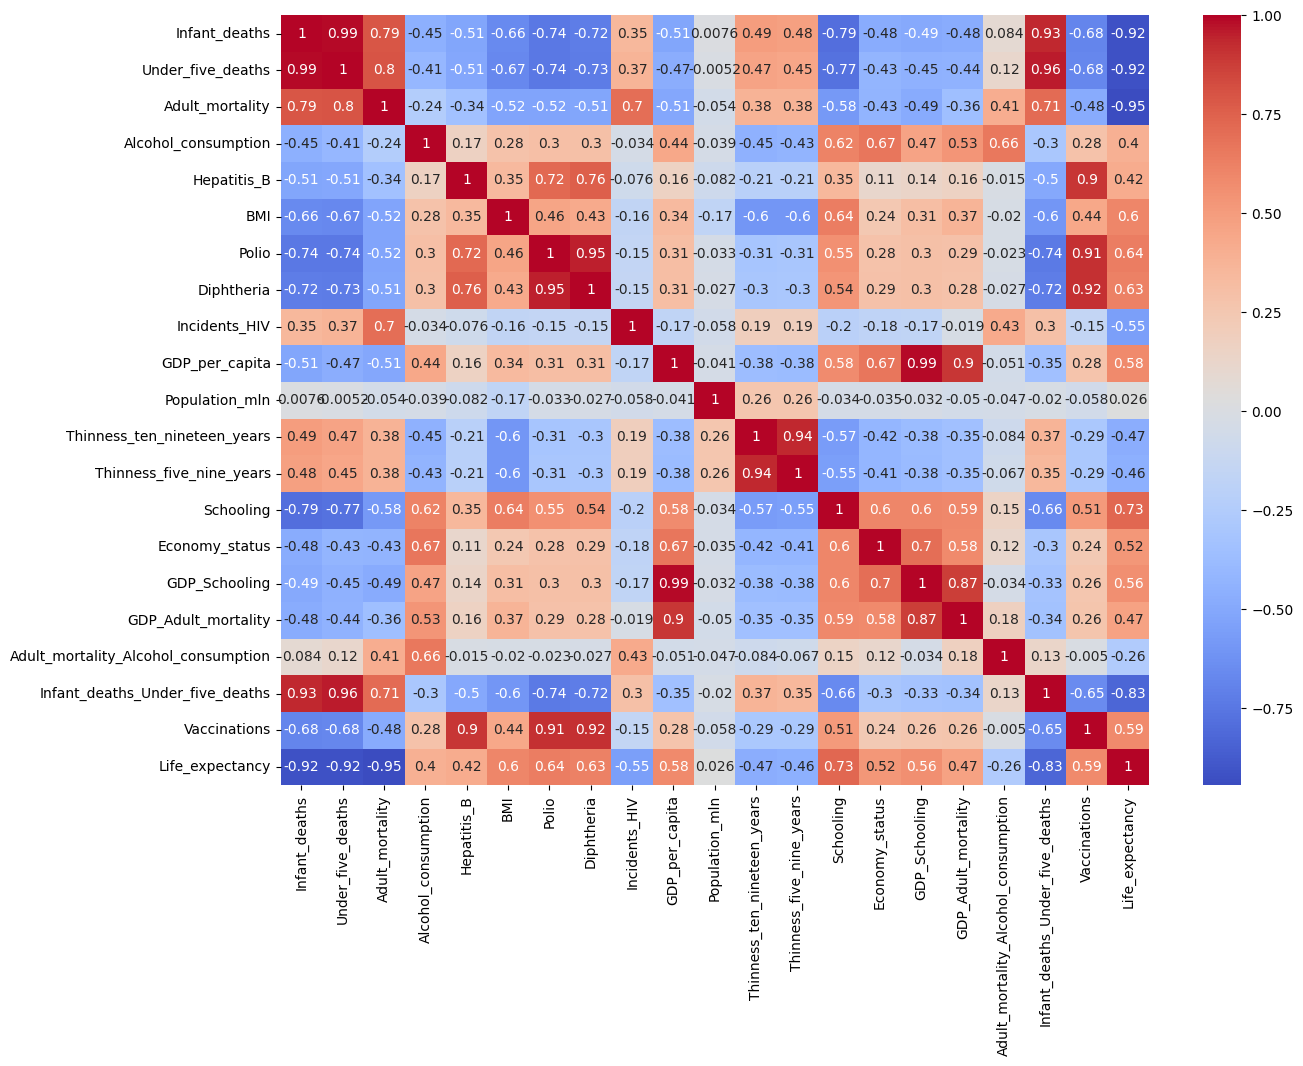

In [ ]:
#Checking for correlation

plt.figure(figsize=(14, 10))
sns.heatmap(new_life_data.corr(), annot=True, cmap='coolwarm')
plt.show()

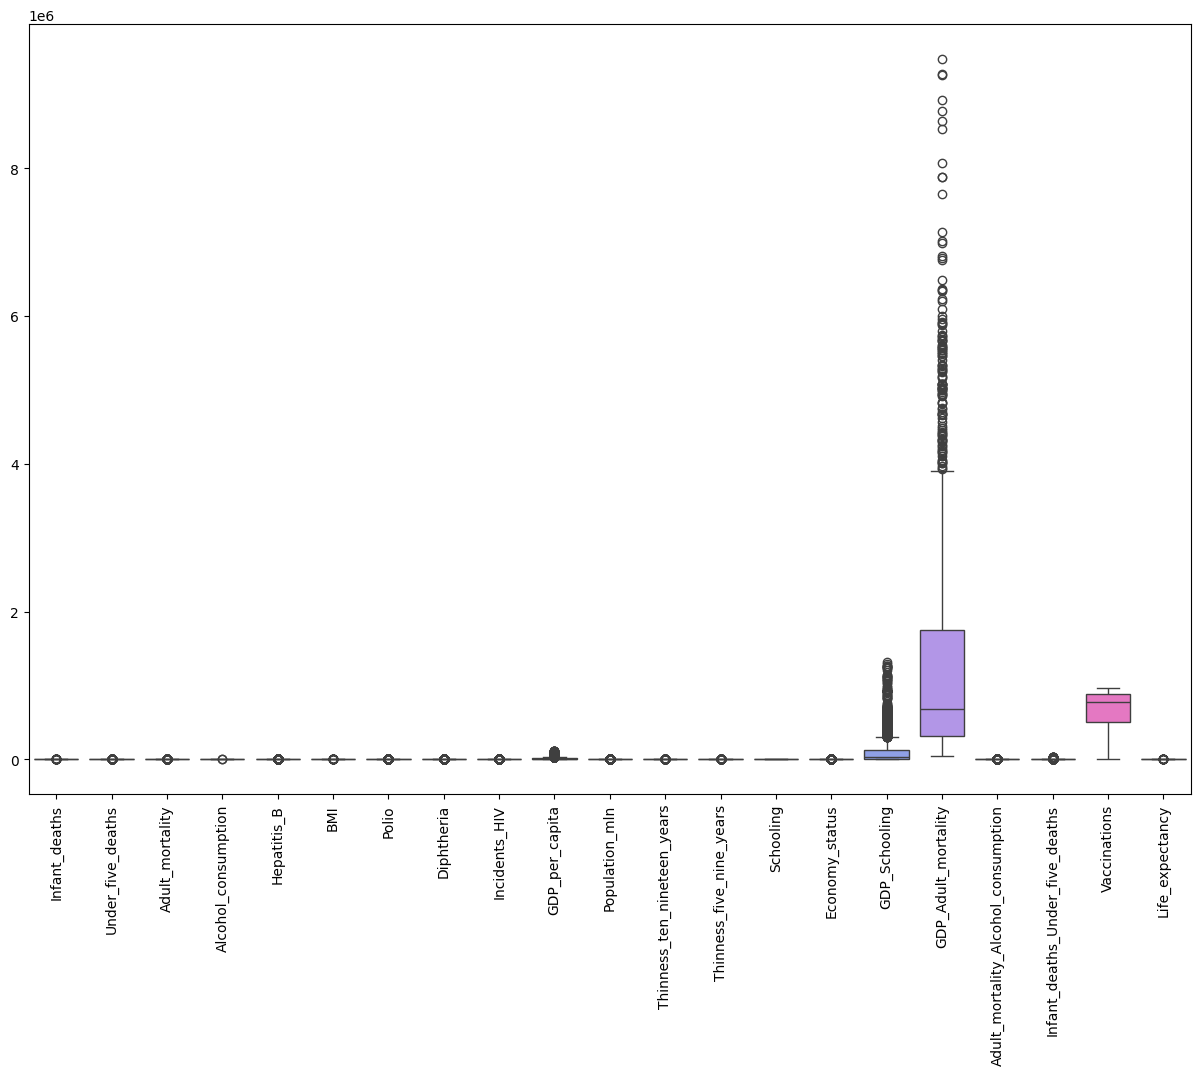

In [ ]:
#Checking for outliers

plt.figure(figsize=(15, 10))
sns.boxplot(data=new_life_data)
plt.xticks(rotation=90)
plt.show()

With handling the outliers, we will be using the similar technique that we implemented in improving the previous model-- Using the IQR technique.

In [ ]:
#handling outliers using the IQR method

for col in new_life_data.columns[:-1]:
  print(f"Column Name: {col}")
  new_life_data = handle_outliers_IQR(new_life_data, col)


Column Name: Infant_deaths
Lower bound: -50.774999999999984, Upper bound: 106.22499999999998
Column Name: Under_five_deaths
Lower bound: -73.125, Upper bound: 147.475
Column Name: Adult_mortality
Lower bound: -84.99268749999999, Upper bound: 420.5138125
Column Name: Alcohol_consumption
Lower bound: -9.17625, Upper bound: 18.49375
Column Name: Hepatitis_B
Lower bound: 58.5, Upper bound: 118.5
Column Name: BMI
Lower bound: 19.875000000000004, Upper bound: 30.474999999999998
Column Name: Polio
Lower bound: 69.5, Upper bound: 113.5
Column Name: Diphtheria
Lower bound: 75.5, Upper bound: 111.5
Column Name: Incidents_HIV
Lower bound: -0.20875, Upper bound: 0.54125
Column Name: GDP_per_capita
Lower bound: -23726.5, Upper bound: 47733.5
Column Name: Population_mln
Lower bound: -32.00125, Upper bound: 60.82875
Column Name: Thinness_ten_nineteen_years
Lower bound: -3.8999999999999995, Upper bound: 10.5
Column Name: Thinness_five_nine_years
Lower bound: -2.35, Upper bound: 7.65
Column Name: Schoo

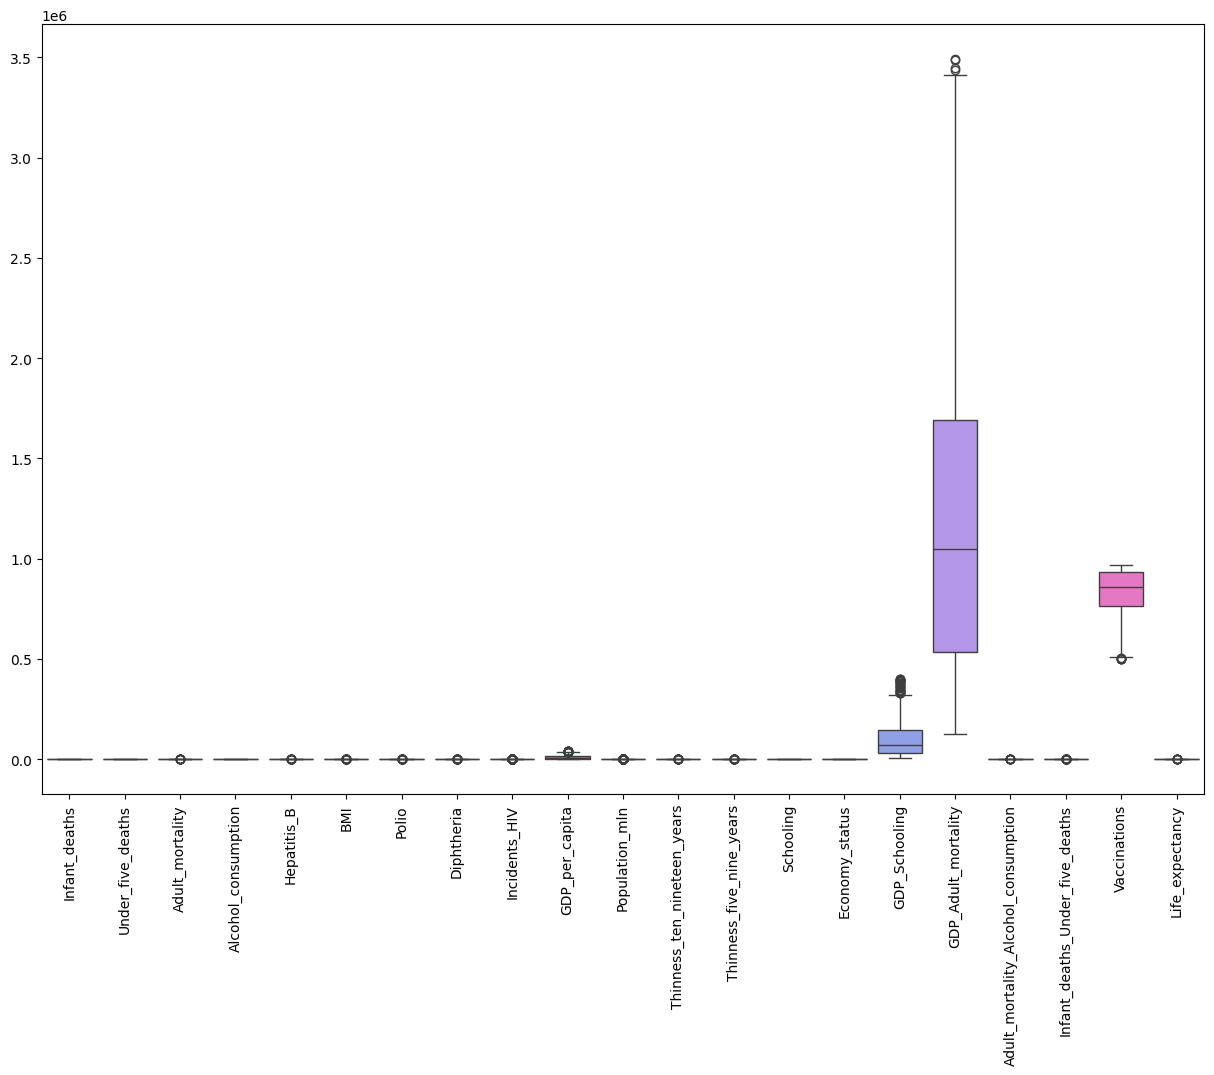

In [ ]:
#Checking for outliers

plt.figure(figsize=(15, 10))
sns.boxplot(data=new_life_data)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Scaling the data

scaler = MinMaxScaler()

for column in new_life_data.columns[:-1]:
  if new_life_data[column].dtype in ['int64', 'float64']:
    new_life_data[column] = scaler.fit_transform(new_life_data[[column]])

new_life_data.describe()


Infant_deaths  Under_five_deaths  Adult_mortality  Alcohol_consumption  \
count    1013.000000        1013.000000      1013.000000          1013.000000   
mean        0.361732           0.357655         0.343223             0.327190   
std         0.248934           0.250549         0.194033             0.218800   
min         0.000000           0.000000         0.000000             0.000000   
25%         0.150160           0.146739         0.193473             0.139718   
50%         0.335463           0.326087         0.330770             0.310423   
75%         0.543131           0.535326         0.472860             0.508169   
max         1.000000           1.000000         1.000000             1.000000   

       Hepatitis_B          BMI        Polio   Diphtheria  Incidents_HIV  \
count  1013.000000  1013.000000  1013.000000  1013.000000    1013.000000   
mean      0.845217     0.549685     0.827739     0.772717       0.251187   
std       0.158762     0.128788     0.177550     0.226589       0.227311   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.769231     0.467532     0.750000     0.666667       0.075472   
50%       0.897436     0.532468     0.892857     0.809524       0.188679   
75%       0.974359     0.623377     0.964286     0.952381       0.301887   
max       1.000000     1.000000     1.000000     1.000000       1.000000   

       GDP_per_capita  Population_mln  Thinness_ten_nineteen_years  \
count     1013.000000     1013.000000                  1013.000000   
mean         0.240748        0.171946                     0.351574   
std          0.220639        0.219067                     0.242156   
min          0.000000        0.000000                     0.000000   
25%          0.072911        0.032120                     0.184211   
50%          0.163070        0.087465                     0.276316   
75%          0.365572        0.182013                     0.473684   
max          1.000000        1.000000                     1.000000   

       Thinness_five_nine_years    Schooling  Economy_status  GDP_Schooling  \
count               1013.000000  1013.000000     1013.000000    1013.000000   
mean                   0.357608     0.559875        0.262586       0.243844   
std                    0.245500     0.226029        0.440257       0.228478   
min                    0.000000     0.000000        0.000000       0.000000   
25%                    0.189189     0.406593        0.000000       0.065800   
50%                    0.283784     0.582418        0.000000       0.160485   
75%                    0.472973     0.736264        1.000000       0.362122   
max                    1.000000     1.000000        1.000000       1.000000   

       GDP_Adult_mortality  Adult_mortality_Alcohol_consumption  \
count          1013.000000                          1013.000000   
mean              0.311002                             0.320411   
std               0.223225                             0.236258   
min               0.000000                             0.000000   
25%               0.121395                             0.152442   
50%               0.274179                             0.277930   
75%               0.465244                             0.475207   
max               1.000000                             1.000000   

       Infant_deaths_Under_five_deaths  Vaccinations  Life_expectancy  
count                      1013.000000   1013.000000      1013.000000  
mean                          0.215286      0.704172        74.249358  
std                           0.226892      0.254831         3.517901  
min                           0.000000      0.000000        64.600000  
25%                           0.037941      0.558856        72.100000  
50%                           0.138219      0.761120        74.300000  
75%                           0.325930      0.917905        76.400000  
max                           1.000000      1.000000        83.200000

In [ ]:
#Splitting the data

X_newlife = new_life_data.iloc[:, :-1]
y_newlife = new_life_data.iloc[:, -1]

test_size = 0.2 #80/20 split

train_X_newlife, test_X_newlife, train_y_newlife, test_y_newlife = train_test_split(X_newlife, y_newlife, test_size=test_size, random_state = 42)

**using the best performing model**

In [ ]:
#Model Implementation

print("Using New Features")
random_forest_regression(200, train_X_newlife, train_y_newlife, test_X_newlife, test_y_newlife, result_4)
result_4_df = pd.DataFrame(result_4)
result_4_df


Using New Features

Random Forest with 200 Trees
MAE: 0.31311576354677856
MSE: 0.161764427339886
RMSE: 0.40219948699605024
R2 Score: 0.9881430510485295


Model       MAE       MSE      RMSE        R2
0  Random Forest with 200 Trees  0.460073  0.412772  0.642473  0.976842
1  Random Forest with 200 Trees  0.313116  0.161764  0.402199  0.988143

As we can observe above, using the different data preprocessing techniques improved our model according to the evaluation metrics shown. The engineered features also helped improve the performance of the model alongside the different techniques that handled the outliers and the inclusion of the new features which were left out in the original model. A lower value of the MAE = 0.313116, MSE = 0.161764, RMSE = 0.402199, and a better $R^2$ score of 0.988143 can be observed in this new model.

##**Lab Activities 8 and 9 Time Spent and Challenges**

> Total Time to Accomplish the Activities : **4 to 5 hours**

> Challenges: Lab activities 8 and 9 were relatively easier compared to the previous activites as I already knew what I was going for-- an improved version of the best performing model created in the prior lab activities. The main challenge that I have encountered when accomplishing these activities were in the feature selection/feature engineering part of process. As stated in my explanations in the sections above, understanding the context of the data and the inherent relationships of the features to one another and the target feature was the most important part in selecting the correct features to use. I took a lot of time researching and studying the datasets provided to see the descriptions of each feature to  try  give weight to their possible interactions in predicting life expectancy. One particular challenge I had encountered was the feature engineering part for the interaction effects of different features. I was not sure on how to capture these interactions properly in a mathematical/technical sense, however, I eventually found resources to back up my idea and implement them in the model. Everything else in the machine learning process went quicker as I have defined the functions for the modelling part to be easy to call.


